# Embedded System project

## ESE10 : Visual wakewords using DEEP Learning Approach 
(Detect Whether a person is present or not in webcam or cctv images)

### Group Members - Aditi Tiwari (B20EE005) & Dhanushree Sisodiya (B20EE015)



In [1]:
!pip install keras

In [2]:
! pip install imageAI
! pip install opencv-python
! pip install Pillow
! pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 311.3 kB/s eta 0:00:00 kB/s eta 0:00:01:01


# Dependencies

https://medium.com/object-detection-using-tensorflow-and-coco-pre/object-detection-using-tensorflow-and-coco-pre-trained-models-5d8386019a8

In [3]:
!pip install seaborn

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

2023-07-10 23:41:33.750789: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-10 23:41:33.760776: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-10 23:41:33.809246: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-10 23:41:33.809784: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-10 23:41:34.414195: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [5]:
import os 
import keras
import numpy as np 
import tensorflow as tf
from IPython.display import clear_output as cls
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import GlobalAvgPool2D as GAP
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras.models import Model
from keras.layers import  Input
from keras.layers import BatchNormalization
# from keras.optimizers import Adam
# import plotly.express as px

In [6]:
root_path_notp = 'vww/notperson'
root_path_p = 'vww/person'

In [7]:
# labels - age, gender, ethnicity
image_paths = []
age_labels = []
#gender_labels = []

for filename in tqdm(os.listdir(root_path_notp)):
    image_path = os.path.join(root_path_notp, filename)
    #temp = filename.split('_')
    image_paths.append(image_path)
    age_labels.append(0)

  0%|          | 0/300 [00:00<?, ?it/s]

In [8]:
len(image_paths), len(age_labels)

(300, 300)

In [9]:
for filename in tqdm(os.listdir(root_path_p)):
    image_path = os.path.join(root_path_p, filename)
    #temp = filename.split('_')
    image_paths.append(image_path)
    age_labels.append(1)

  0%|          | 0/300 [00:00<?, ?it/s]

In [10]:
len(image_paths), len(age_labels)

(600, 600)

In [11]:
# convert to dataframe
df = pd.DataFrame()
df['image'], df['person'] = image_paths, age_labels
df.head()

image  person
0  vww/notperson/000000005503.jpg       0
1  vww/notperson/000000007991.jpg       0
2  vww/notperson/000000015746.jpg       0
3  vww/notperson/000000046378.jpg       0
4  vww/notperson/000000046804.jpg       0

In [12]:
df_shuffle = df.sample(frac = 1)

In [13]:
df_shuffle.tail()

image  person
552     vww/person/000000015597.jpg       1
484     vww/person/000000060886.jpg       1
44   vww/notperson/000000050679.jpg       0
417     vww/person/000000032861.jpg       1
214  vww/notperson/000000065485.jpg       0

In [14]:
# map labels for gender
person_detection = {0:'Not present', 1:'Present'}

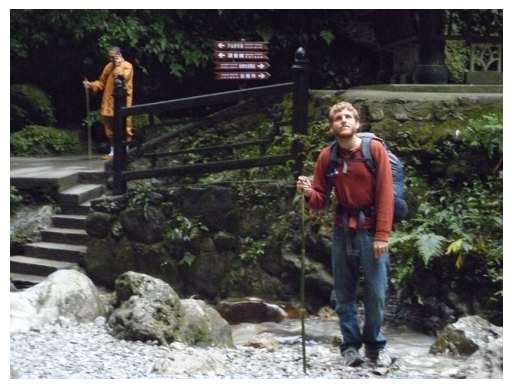

In [15]:
from PIL import Image
img = Image.open(df['image'][400])
plt.axis('off')
plt.imshow(img);

<Axes: xlabel='person', ylabel='Density'>

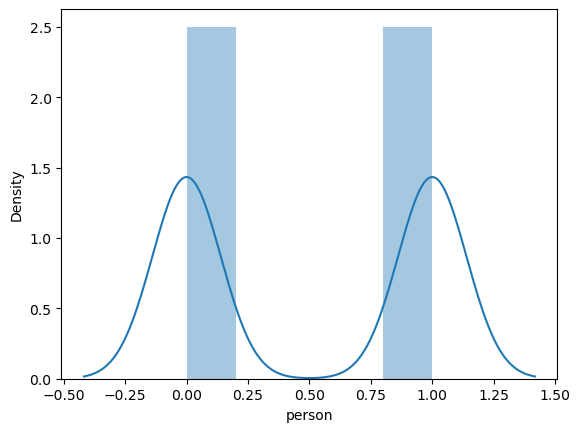

In [16]:
sns.distplot(df['person'])

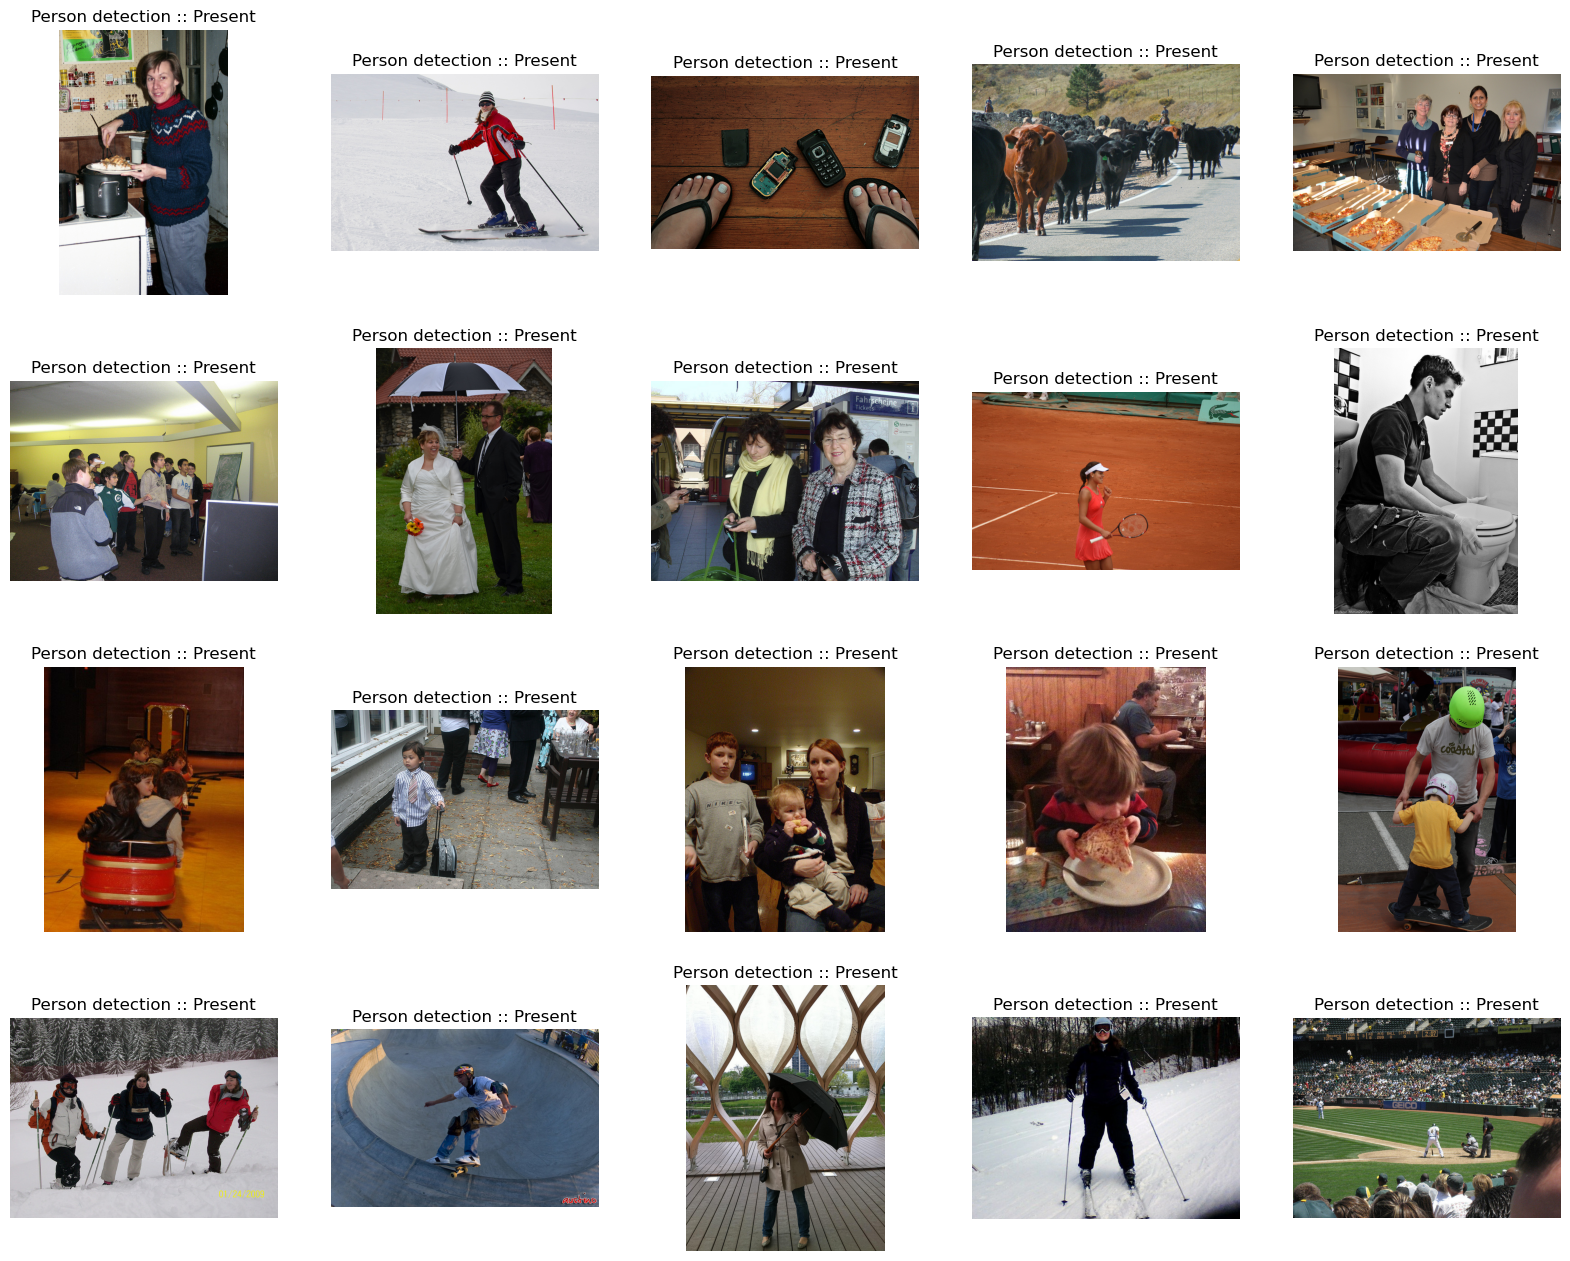

In [17]:
# to display grid of images
plt.figure(figsize=(20, 20))
files = df.iloc[352:372]

for index, file, age in files.itertuples():
    plt.subplot(5, 5, index-351)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Person detection :: {person_detection[age]}")
    plt.axis('off')

In [18]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=False)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # ignore this step if using RGB
    #features = features.reshape(len(features), 128, 128, 1)
    return features

In [19]:
X = extract_features(df_shuffle['image'])

  0%|          | 0/600 [00:00<?, ?it/s]

In [20]:
X.shape

(600, 128, 128, 3)

In [21]:
# normalize the images
# X = X/255.0

In [22]:
y_person = np.array(df_shuffle['person'])

In [23]:
input_shape = (128, 128, 3)

# Impletation of model from pretrained model using VGG16

In [24]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(include_top=False, input_shape = input_shape, # Shape of our images 
weights = 'imagenet')

2023-07-10 23:42:33.418307: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


58889256/58889256 [==============================] - 6s 0us/step


In [70]:
for layer in base_model.layers:
    layer.trainable = False

In [71]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [72]:
from tensorflow.keras import layers 

In [73]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)
# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

In [74]:
for layer in model.layers:
    weights=layer.get_weights()
    print(np.array(weights).dtype)

float64
object
object
float64
object
object
float64
object
object
object
float64
object
object
object
float64
object
object
object
float64
float64
object
float64
object


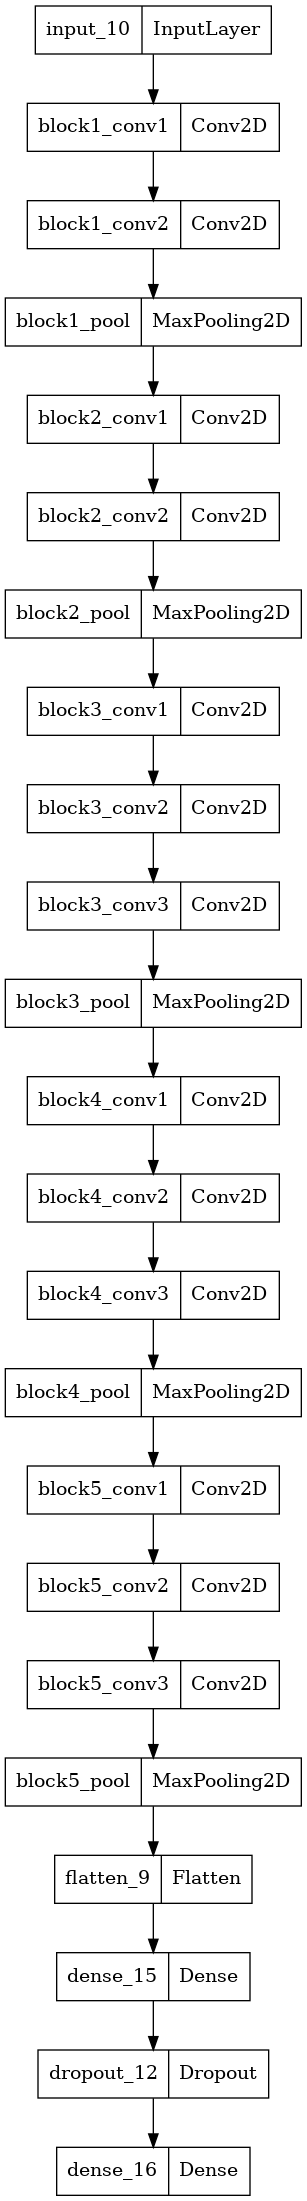

In [75]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [76]:
# train model
history = model.fit(x=X, y= y_person, batch_size=50, epochs=10, validation_split=0.2, shuffle=True)

Epoch 1/10
10/10 [==============================] - 4s 314ms/step - loss: 0.7702 - acc: 0.6042 - val_loss: 0.5560 - val_acc: 0.7167
Epoch 2/10
10/10 [==============================] - 3s 292ms/step - loss: 0.5610 - acc: 0.7125 - val_loss: 0.5698 - val_acc: 0.7000
Epoch 3/10
10/10 [==============================] - 3s 291ms/step - loss: 0.4601 - acc: 0.7937 - val_loss: 0.6896 - val_acc: 0.5750
Epoch 4/10
10/10 [==============================] - 3s 291ms/step - loss: 0.4070 - acc: 0.8146 - val_loss: 0.6820 - val_acc: 0.5917
Epoch 5/10
10/10 [==============================] - 3s 290ms/step - loss: 0.4007 - acc: 0.7979 - val_loss: 0.5728 - val_acc: 0.7167
Epoch 6/10
10/10 [==============================] - 3s 292ms/step - loss: 0.3131 - acc: 0.8625 - val_loss: 0.5415 - val_acc: 0.7333
Epoch 7/10
10/10 [==============================] - 3s 290ms/step - loss: 0.2865 - acc: 0.8854 - val_loss: 0.5187 - val_acc: 0.7667
Epoch 8/10
10/10 [==============================] - 3s 288ms/step - loss: 0.

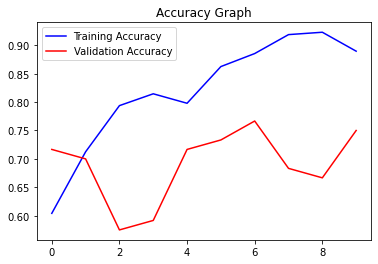

<Figure size 432x288 with 0 Axes>

In [77]:
# plot results for gender
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()
plt.show()

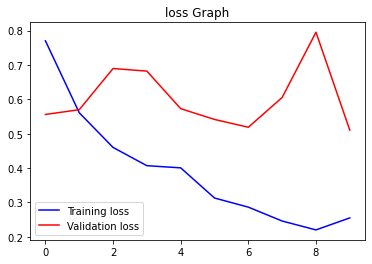

<Figure size 432x288 with 0 Axes>

In [78]:
# plot results for loss
acc = history.history['loss']
val_acc = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training loss')
plt.plot(epochs, val_acc, 'r', label='Validation loss')
plt.title('loss Graph')
plt.legend()
plt.figure()
plt.show()

Original Detection: Present
Predicted Person: Present


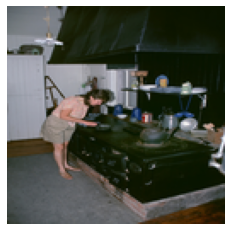

In [79]:
image_index = 9
print("Original Detection:", person_detection[y_person[image_index]])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 3))
pred_person = person_detection[round(pred[0][0])]
print("Predicted Person:", pred_person)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128,3), cmap='gray');

Original Detection: Not present
Predicted Person: Not present


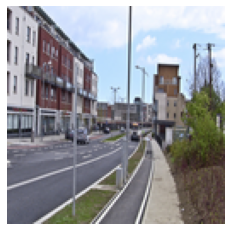

In [80]:
image_index = 12
print("Original Detection:", person_detection[y_person[image_index]])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 3))
pred_person = person_detection[round(pred[0][0])]
print("Predicted Person:", pred_person)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128,3), cmap='gray');

Original Detection: Not present
Predicted Person: Not present


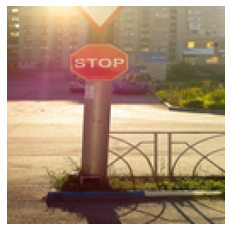

In [81]:
image_index = 8
print("Original Detection:", person_detection[y_person[image_index]])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 3))
pred_person = person_detection[round(pred[0][0])]
print("Predicted Person:", pred_person)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128,3), cmap='gray');

# **Making Deep learning model from scratch**

# Part - 1 (i)

# Effect of Changing the number of layers

First Neural network (7 convolution + 4 dense layer)

In [82]:
input_shape = (128, 128, 3)

In [83]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
conv_2 = Conv2D(54, kernel_size=(3, 3), activation='relu') (conv_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_4 = Conv2D(96, kernel_size=(3, 3), activation='relu') (maxp_2)
conv_5 = Conv2D(128, kernel_size=(3, 3), activation='relu') (conv_4)
maxp_5 = MaxPooling2D(pool_size=(2, 2)) (conv_5)
conv_6 = Conv2D(156, kernel_size=(3, 3), activation='relu') (maxp_5)
conv_7 = Conv2D(212, kernel_size=(3, 3), activation='relu') (conv_6)
maxp_7 = MaxPooling2D(pool_size=(2, 2)) (conv_7)
conv_8 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_7)
maxp_8 = MaxPooling2D(pool_size=(2, 2)) (conv_8)

flatten = Flatten() (maxp_8)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dropout_1 = Dropout(0.3) (dense_1)
dense_2 = Dense(128, activation='relu') (dropout_1)
dropout_2 = Dropout(0.3) (dense_2)
dense_3 = Dense(32, activation='relu') (dropout_2)
output_1 = Dense(1, activation='sigmoid', name='person_detected') (dense_3)

model = Model(inputs=[inputs], outputs= output_1)

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])

In [84]:
# train model
history = model.fit(x=X, y= y_person, batch_size=50, epochs=10, validation_split=0.2, shuffle=False)

Epoch 1/10
10/10 [==============================] - 9s 812ms/step - loss: 0.6987 - accuracy: 0.5146 - val_loss: 0.6964 - val_accuracy: 0.4250
Epoch 2/10
10/10 [==============================] - 8s 780ms/step - loss: 0.6904 - accuracy: 0.5146 - val_loss: 0.6938 - val_accuracy: 0.4250
Epoch 3/10
10/10 [==============================] - 8s 793ms/step - loss: 0.6811 - accuracy: 0.5229 - val_loss: 0.9914 - val_accuracy: 0.4250
Epoch 4/10
10/10 [==============================] - 8s 789ms/step - loss: 0.7035 - accuracy: 0.5208 - val_loss: 0.6980 - val_accuracy: 0.4250
Epoch 5/10
10/10 [==============================] - 8s 790ms/step - loss: 0.6909 - accuracy: 0.5083 - val_loss: 0.7030 - val_accuracy: 0.4250
Epoch 6/10
10/10 [==============================] - 8s 792ms/step - loss: 0.6882 - accuracy: 0.5188 - val_loss: 0.7068 - val_accuracy: 0.4250
Epoch 7/10
10/10 [==============================] - 8s 793ms/step - loss: 0.6881 - accuracy: 0.5396 - val_loss: 0.7177 - val_accuracy: 0.4250
Epoch 

In [85]:
model.save('human_detection_model.h5')

In [86]:
from tensorflow import keras
model = keras.models.load_model('human_detection_model.h5')

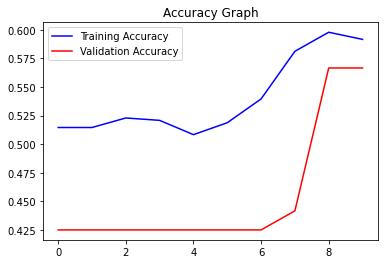

<Figure size 432x288 with 0 Axes>

In [87]:
# Accuracy plot results for person detection
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()
plt.show()

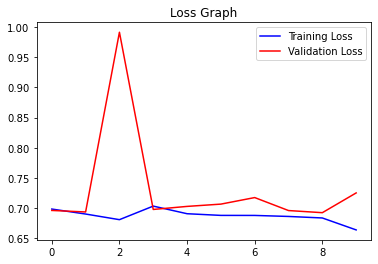

In [88]:
# loss plot for person detection
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [89]:
model.predict(X[image_index].reshape(1, 128, 128, 3))

array([[0.48065668]], dtype=float32)

Original Detection: Present
Predicted Person: Present


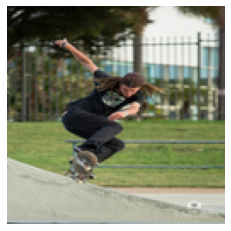

In [90]:
image_index = 13
print("Original Detection:", person_detection[y_person[image_index]])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 3))
pred_person = person_detection[round(pred[0][0])]
print("Predicted Person:", pred_person)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128,3), cmap='gray');

Original Detection: Not present
Predicted Person: Present


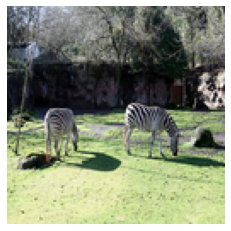

In [91]:
image_index =  500
print("Original Detection:", person_detection[y_person[image_index]])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 3))
pred_person = person_detection[round(pred[0][0])]
print("Predicted Person:", pred_person)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128,3), cmap='gray');

Second Neural network (6 convolution + 3 dense layer)

In [92]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(96, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_3)
conv_5 = Conv2D(212, kernel_size=(3, 3), activation='relu') (conv_4)
maxp_5 = MaxPooling2D(pool_size=(2, 2)) (conv_5)
conv_6 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_5)
maxp_6 = MaxPooling2D(pool_size=(2, 2)) (conv_6)

flatten = Flatten() (maxp_6)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dropout_1 = Dropout(0.3) (dense_1)
dense_2 = Dense(128, activation='relu') (dropout_1)
dropout_2 = Dropout(0.3) (dense_2)
output_1 = Dense(1, activation='sigmoid', name='person_detected') (dropout_2)

model = Model(inputs=[inputs], outputs= output_1)

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])
# train model
history = model.fit(x=X, y= y_person, batch_size=50, epochs=10, validation_split=0.2, shuffle=False)

Epoch 1/10
10/10 [==============================] - 2s 146ms/step - loss: 0.6972 - accuracy: 0.5083 - val_loss: 0.6957 - val_accuracy: 0.4250
Epoch 2/10
10/10 [==============================] - 1s 124ms/step - loss: 0.6926 - accuracy: 0.5229 - val_loss: 0.6916 - val_accuracy: 0.4250
Epoch 3/10
10/10 [==============================] - 1s 125ms/step - loss: 0.6838 - accuracy: 0.5896 - val_loss: 0.7324 - val_accuracy: 0.4250
Epoch 4/10
10/10 [==============================] - 1s 124ms/step - loss: 0.6568 - accuracy: 0.6479 - val_loss: 0.7813 - val_accuracy: 0.5583
Epoch 5/10
10/10 [==============================] - 1s 124ms/step - loss: 0.6837 - accuracy: 0.5813 - val_loss: 0.7384 - val_accuracy: 0.5500
Epoch 6/10
10/10 [==============================] - 1s 124ms/step - loss: 0.6696 - accuracy: 0.6687 - val_loss: 0.6734 - val_accuracy: 0.6500
Epoch 7/10
10/10 [==============================] - 1s 122ms/step - loss: 0.6253 - accuracy: 0.6500 - val_loss: 0.6697 - val_accuracy: 0.6333
Epoch 

Third Neural Network (4 convolution + 3 dense layer)

In [93]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (conv_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dropout_1 = Dropout(0.4) (dense_1)
dense_2 = Dense(64, activation='relu') (dropout_1)
dropout_2 = Dropout(0.3) (dense_2)
output_1 = Dense(1, activation='sigmoid', name='person_detected') (dropout_2)

model = Model(inputs=[inputs], outputs= output_1)

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])
# train model
history = model.fit(x=X, y= y_person, batch_size=50, epochs=10, validation_split=0.2, shuffle=False)

Epoch 1/10
10/10 [==============================] - 3s 208ms/step - loss: 0.7559 - accuracy: 0.4938 - val_loss: 0.6949 - val_accuracy: 0.4250
Epoch 2/10
10/10 [==============================] - 2s 188ms/step - loss: 0.6844 - accuracy: 0.5500 - val_loss: 0.6678 - val_accuracy: 0.5917
Epoch 3/10
10/10 [==============================] - 2s 186ms/step - loss: 0.6630 - accuracy: 0.5979 - val_loss: 0.6876 - val_accuracy: 0.5750
Epoch 4/10
10/10 [==============================] - 2s 186ms/step - loss: 0.6451 - accuracy: 0.6417 - val_loss: 0.6503 - val_accuracy: 0.6583
Epoch 5/10
10/10 [==============================] - 2s 188ms/step - loss: 0.6331 - accuracy: 0.6500 - val_loss: 0.6608 - val_accuracy: 0.6083
Epoch 6/10
10/10 [==============================] - 2s 187ms/step - loss: 0.6129 - accuracy: 0.6729 - val_loss: 0.6645 - val_accuracy: 0.6000
Epoch 7/10
10/10 [==============================] - 2s 194ms/step - loss: 0.5705 - accuracy: 0.7083 - val_loss: 0.7136 - val_accuracy: 0.5833
Epoch 

Fourth Neural Network (2 convolution + 2 dense layer)

In [94]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)

flatten = Flatten() (maxp_2)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dropout_1 = Dropout(0.3) (dense_1)

output_1 = Dense(1, activation='sigmoid', name='person_detected') (dropout_1)

model = Model(inputs=[inputs], outputs= output_1)

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])
# train model
history = model.fit(x=X, y= y_person, batch_size=50, epochs=10, validation_split=0.2, shuffle=False)

Epoch 1/10
10/10 [==============================] - 3s 290ms/step - loss: 2.5277 - accuracy: 0.4771 - val_loss: 0.6936 - val_accuracy: 0.4250
Epoch 2/10
10/10 [==============================] - 3s 264ms/step - loss: 0.6723 - accuracy: 0.5542 - val_loss: 0.6868 - val_accuracy: 0.5750
Epoch 3/10
10/10 [==============================] - 3s 272ms/step - loss: 0.5909 - accuracy: 0.6917 - val_loss: 0.9531 - val_accuracy: 0.5583
Epoch 4/10
10/10 [==============================] - 3s 274ms/step - loss: 0.5162 - accuracy: 0.7604 - val_loss: 0.7258 - val_accuracy: 0.6083
Epoch 5/10
10/10 [==============================] - 3s 269ms/step - loss: 0.4095 - accuracy: 0.8229 - val_loss: 0.7547 - val_accuracy: 0.6083
Epoch 6/10
10/10 [==============================] - 3s 276ms/step - loss: 0.2666 - accuracy: 0.9062 - val_loss: 0.9732 - val_accuracy: 0.5667
Epoch 7/10
10/10 [==============================] - 3s 257ms/step - loss: 0.1527 - accuracy: 0.9563 - val_loss: 1.4759 - val_accuracy: 0.4750
Epoch 

# Part - 2 (ii)

# Reducing the size of the neural network design (change of parameters)

First Neural Network ( 512 output channel in last convolution layer)

In [95]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)
conv_5 = Conv2D(512, kernel_size=(3, 3), activation='relu') (maxp_4)
maxp_5 = MaxPooling2D(pool_size=(2, 2)) (conv_5)

flatten = Flatten() (maxp_5)

# fully connected layers
dense_1 = Dense(512, activation='relu') (flatten)
dropout_1 = Dropout(0.3) (dense_1)
output_1 = Dense(1, activation='sigmoid', name='person_detected') (dropout_1)

model = Model(inputs=[inputs], outputs= output_1)

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])
# train model
history = model.fit(x=X, y= y_person, batch_size=50, epochs=10, validation_split=0.2, shuffle=False)

Epoch 1/10
10/10 [==============================] - 2s 156ms/step - loss: 0.6998 - accuracy: 0.5063 - val_loss: 0.6972 - val_accuracy: 0.4250
Epoch 2/10
10/10 [==============================] - 1s 142ms/step - loss: 0.6824 - accuracy: 0.5396 - val_loss: 0.6652 - val_accuracy: 0.6000
Epoch 3/10
10/10 [==============================] - 1s 137ms/step - loss: 0.6502 - accuracy: 0.6479 - val_loss: 0.6533 - val_accuracy: 0.5917
Epoch 4/10
10/10 [==============================] - 1s 138ms/step - loss: 0.6218 - accuracy: 0.6771 - val_loss: 0.6759 - val_accuracy: 0.6000
Epoch 5/10
10/10 [==============================] - 1s 135ms/step - loss: 0.5912 - accuracy: 0.7021 - val_loss: 0.6801 - val_accuracy: 0.6000
Epoch 6/10
10/10 [==============================] - 1s 139ms/step - loss: 0.6101 - accuracy: 0.6958 - val_loss: 0.6372 - val_accuracy: 0.5833
Epoch 7/10
10/10 [==============================] - 1s 138ms/step - loss: 0.5622 - accuracy: 0.7104 - val_loss: 0.7687 - val_accuracy: 0.5917
Epoch 

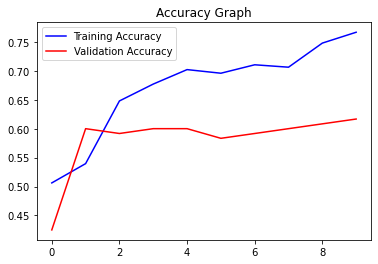

<Figure size 432x288 with 0 Axes>

In [96]:
# Accuracy plot results for person detection
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()
plt.show()

Second neural network ( 256 output channel in last convolution layer)

In [97]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(212, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)
conv_5 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_4)
maxp_5 = MaxPooling2D(pool_size=(2, 2)) (conv_5)

flatten = Flatten() (maxp_5)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dropout_1 = Dropout(0.3) (dense_1)
output_1 = Dense(1, activation='sigmoid', name='person_detected') (dropout_1)

model = Model(inputs=[inputs], outputs= output_1)

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])
# train model
history = model.fit(x=X, y= y_person, batch_size=50, epochs=10, validation_split=0.2, shuffle=False)

Epoch 1/10
10/10 [==============================] - 2s 146ms/step - loss: 0.6936 - accuracy: 0.5208 - val_loss: 0.6934 - val_accuracy: 0.4250
Epoch 2/10
10/10 [==============================] - 1s 125ms/step - loss: 0.6704 - accuracy: 0.5750 - val_loss: 0.6634 - val_accuracy: 0.6250
Epoch 3/10
10/10 [==============================] - 1s 127ms/step - loss: 0.6382 - accuracy: 0.6521 - val_loss: 0.6689 - val_accuracy: 0.6333
Epoch 4/10
10/10 [==============================] - 1s 124ms/step - loss: 0.6014 - accuracy: 0.6812 - val_loss: 0.7048 - val_accuracy: 0.6250
Epoch 5/10
10/10 [==============================] - 1s 124ms/step - loss: 0.6083 - accuracy: 0.7063 - val_loss: 0.6282 - val_accuracy: 0.5917
Epoch 6/10
10/10 [==============================] - 1s 125ms/step - loss: 0.5938 - accuracy: 0.6875 - val_loss: 0.6395 - val_accuracy: 0.6000
Epoch 7/10
10/10 [==============================] - 1s 126ms/step - loss: 0.5694 - accuracy: 0.7188 - val_loss: 0.6759 - val_accuracy: 0.6250
Epoch 

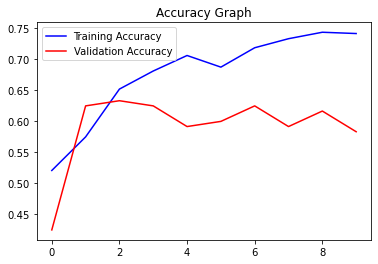

<Figure size 432x288 with 0 Axes>

In [98]:
# Accuracy plot results for person detection
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()
plt.show()

Third Neural network (128 output channel in last layer)

In [99]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(54, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(128, activation='relu') (flatten)
dropout_1 = Dropout(0.3) (dense_1)
output_1 = Dense(1, activation='sigmoid', name='person_detected') (dropout_1)

model = Model(inputs=[inputs], outputs= output_1)

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])
# train model
history = model.fit(x=X, y= y_person, batch_size=50, epochs=10, validation_split=0.2, shuffle=False)

Epoch 1/10
10/10 [==============================] - 2s 122ms/step - loss: 0.7008 - accuracy: 0.4958 - val_loss: 0.6942 - val_accuracy: 0.4417
Epoch 2/10
10/10 [==============================] - 1s 104ms/step - loss: 0.6777 - accuracy: 0.5833 - val_loss: 0.6614 - val_accuracy: 0.6167
Epoch 3/10
10/10 [==============================] - 1s 106ms/step - loss: 0.6411 - accuracy: 0.6333 - val_loss: 0.6435 - val_accuracy: 0.6250
Epoch 4/10
10/10 [==============================] - 1s 104ms/step - loss: 0.6057 - accuracy: 0.6604 - val_loss: 0.6952 - val_accuracy: 0.6083
Epoch 5/10
10/10 [==============================] - 1s 107ms/step - loss: 0.6105 - accuracy: 0.6812 - val_loss: 0.6224 - val_accuracy: 0.6167
Epoch 6/10
10/10 [==============================] - 1s 106ms/step - loss: 0.5696 - accuracy: 0.7104 - val_loss: 0.6797 - val_accuracy: 0.5750
Epoch 7/10
10/10 [==============================] - 1s 105ms/step - loss: 0.5606 - accuracy: 0.7167 - val_loss: 0.6274 - val_accuracy: 0.5833
Epoch 

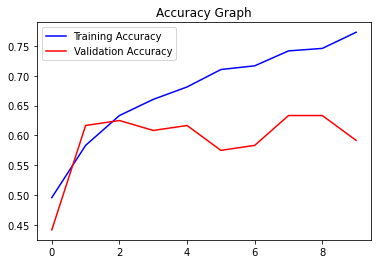

<Figure size 432x288 with 0 Axes>

In [100]:
# Accuracy plot results for person detection
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()
plt.show()

# Improved model

In [55]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu',name ='conv1') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2),name ='pool1') (conv_1)
conv_2 = Conv2D(13, kernel_size=(3, 3), activation='relu',name ='conv2') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2),name ='pool2') (conv_2)
conv_3 = Conv2D(9, kernel_size=(3, 3), activation='relu',name ='conv3') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2),name ='pool3') (conv_3)
conv_4 = Conv2D(8, kernel_size=(3, 3), activation='relu',name ='conv4') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2),name ='pool4') (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(14, activation='relu',name ='dense1') (flatten)
dropout_1 = Dropout(0.4) (dense_1)
dense_3 = Dense(40, activation='relu',name ='dense2') (dropout_1)
output_1 = Dense(1, activation='sigmoid', name='output') (dense_3)

model = Model(inputs=[inputs], outputs = output_1)

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])
 
model.summary()

Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 126, 126, 32)      896       
                                                                 
 pool1 (MaxPooling2D)        (None, 63, 63, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 61, 61, 13)        3757      
                                                                 
 pool2 (MaxPooling2D)        (None, 30, 30, 13)        0         
                                                                 
 conv3 (Conv2D)              (None, 28, 28, 9)         1062      
                                                                 
 pool3 (MaxPooling2D)        (None, 14, 14, 9)         0  

In [56]:
history = model.fit(x=X, y= y_person, batch_size=60, epochs=20, validation_split=0.1, shuffle=True)

Epoch 1/20
9/9 [==============================] - 2s 112ms/step - loss: 5.0742 - accuracy: 0.5000 - val_loss: 0.7308 - val_accuracy: 0.5833
Epoch 2/20
9/9 [==============================] - 1s 102ms/step - loss: 0.8845 - accuracy: 0.4944 - val_loss: 0.7659 - val_accuracy: 0.4333
Epoch 3/20
9/9 [==============================] - 1s 102ms/step - loss: 0.7244 - accuracy: 0.4833 - val_loss: 0.7101 - val_accuracy: 0.4000
Epoch 4/20
9/9 [==============================] - 1s 103ms/step - loss: 0.7023 - accuracy: 0.4833 - val_loss: 0.6944 - val_accuracy: 0.5500
Epoch 5/20
9/9 [==============================] - 1s 102ms/step - loss: 0.6905 - accuracy: 0.4926 - val_loss: 0.6925 - val_accuracy: 0.5500
Epoch 6/20
9/9 [==============================] - 1s 101ms/step - loss: 0.6871 - accuracy: 0.5037 - val_loss: 0.6892 - val_accuracy: 0.6333
Epoch 7/20
9/9 [==============================] - 1s 106ms/step - loss: 0.6830 - accuracy: 0.5574 - val_loss: 0.6880 - val_accuracy: 0.5667
Epoch 8/20
9/9 [====

In [60]:
 
import hls4ml
 
hls_config = hls4ml.utils.config_from_keras_model(model, granularity='name')
hls_config['Model']['ReuseFactor'] = 2458
hls_config['LayerName']['conv1']['Strategy'] = 'Latency'
hls_config['LayerName']['conv2']['Strategy'] = 'Latency'
 
hls_config['LayerName']['pool1']['Strategy'] = 'Latency'
hls_config['LayerName']['pool2']['Strategy'] = 'Latency'
 

hls_config['Model']['Precision'] = 'ap_fixed<8,6>'
hls_config['LayerName']['output']['Strategy'] = 'Stable'
#plotting.print_dict(hls_config_aq)
hls_config['Flows'] = ['vivado:fifo_depth_optimization']
hls4ml.model.optimizer.get_optimizer('vivado:fifo_depth_optimization').configure(profiling_fifo_depth=100)


cfg = hls4ml.converters.create_config(backend='Vivado')
cfg['IOType'] = 'io_stream'  # Must set this if using CNNs!
cfg['HLSConfig'] = hls_config
cfg['KerasModel'] = model
cfg['OutputDir'] = 'normal_cnn/'
cfg['Part'] = 'xczu7ev-ffvc1156-2-e'

hls_model = hls4ml.converters.keras_to_hls(cfg)
 
 

print("----------------compilation starts-------------------")
hls_model.compile()
 
print("----------------compilation done-------------------")

Interpreting Model
Topology:
Layer name: input_28, layer type: InputLayer, input shapes: [[None, 128, 128, 3]], output shape: [None, 128, 128, 3]
Layer name: conv1, layer type: Conv2D, input shapes: [[None, 128, 128, 3]], output shape: [None, 126, 126, 32]
Layer name: pool1, layer type: MaxPooling2D, input shapes: [[None, 126, 126, 32]], output shape: [None, 63, 63, 32]
Layer name: conv2, layer type: Conv2D, input shapes: [[None, 63, 63, 32]], output shape: [None, 61, 61, 13]
Layer name: pool2, layer type: MaxPooling2D, input shapes: [[None, 61, 61, 13]], output shape: [None, 30, 30, 13]
Layer name: conv3, layer type: Conv2D, input shapes: [[None, 30, 30, 13]], output shape: [None, 28, 28, 9]
Layer name: pool3, layer type: MaxPooling2D, input shapes: [[None, 28, 28, 9]], output shape: [None, 14, 14, 9]
Layer name: conv4, layer type: Conv2D, input shapes: [[None, 14, 14, 9]], output shape: [None, 12, 12, 8]
Layer name: pool4, layer type: MaxPooling2D, input shapes: [[None, 12, 12, 8]], 

INFO: [HLS 200-489] Unrolling loop 'ResPack' (firmware/nnet_utils/nnet_dense_stream.h:58) in function 'void nnet::dense<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 40u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 1u>, config19>(hls::stream<FORWARD_REFERENCE>&, hls::stream<FORWARD_REFERENCE>&, FORWARD_REFERENCE::weight_t*, FORWARD_REFERENCE::bias_t*)' completely with a factor of 1.
INFO: [HLS 200-489] Unrolling loop 'SigmoidPackLoop' (firmware/nnet_utils/nnet_activation_stream.h:88) in function 'void nnet::sigmoid<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 1u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 1u>, sigmoid_config20>(hls::stream<FORWARD_REFERENCE>&, hls::stream<FORWARD_REFERENCE>&)' completely with a factor of 1.
INFO: [HLS 200-489] Unrolling loop 'MultLoop' (firmware/nnet_utils/nnet_dense_resource.h:136) in function 'void nnet::dense_resource_rf_gt_nin_rem0<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fix

INFO: [HLS 200-111] Finished Standard Transforms Time (s): cpu = 00:00:30 ; elapsed = 00:00:32 . Memory (MB): peak = 941.031 ; gain = 525.934 ; free physical = 10843 ; free virtual = 104496
INFO: [HLS 200-10] Checking synthesizability ...
INFO: [HLS 200-111] Finished Checking Synthesizability Time (s): cpu = 00:00:32 ; elapsed = 00:00:33 . Memory (MB): peak = 941.031 ; gain = 525.934 ; free physical = 10840 ; free virtual = 104493
INFO: [XFORM 203-1101] Packing variable 'out_data.data.V' (firmware/nnet_utils/nnet_activation_stream.h:84) into a 16-bit variable.
INFO: [XFORM 203-1101] Packing variable 'out_data.data.V' (firmware/nnet_utils/nnet_activation_stream.h:45) into a 144-bit variable.
INFO: [XFORM 203-1101] Packing variable 'out_data.data.V' (firmware/nnet_utils/nnet_activation_stream.h:45) into a 128-bit variable.
INFO: [XFORM 203-1101] Packing variable 'out_data.data.V' (firmware/nnet_utils/nnet_activation_stream.h:45) into a 640-bit variable.
INFO: [XFORM 203-1101] Packing var

INFO: [HLS 200-489] Unrolling loop 'ReLUPackLoop' (firmware/nnet_utils/nnet_activation_stream.h:49) in function 'nnet::relu<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 32u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 32u>, relu_config3>' completely with a factor of 32.
INFO: [HLS 200-489] Unrolling loop 'ReLUPackLoop' (firmware/nnet_utils/nnet_activation_stream.h:49) in function 'nnet::relu<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 14u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 14u>, relu_config16>' completely with a factor of 14.
INFO: [HLS 200-489] Unrolling loop 'ReLUPackLoop' (firmware/nnet_utils/nnet_activation_stream.h:49) in function 'nnet::relu<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 13u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 13u>, relu_config6>' completely with a factor of 13.
INFO: [HLS 200-489] Unrolling loop 'UpdateBuffer' (firmware/nnet_utils/nnet_conv_stream.h:

INFO: [HLS 200-489] Unrolling loop 'UpdateBuffer' (firmware/nnet_utils/nnet_conv_stream.h:233) in function 'nnet::pooling2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 13u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 13u>, config7>' completely with a factor of 13.
INFO: [HLS 200-489] Unrolling loop 'LineBufferDataIn' (firmware/nnet_utils/nnet_conv_stream.h:241) in function 'nnet::pooling2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 13u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 13u>, config7>' completely with a factor of 13.
INFO: [HLS 200-489] Unrolling loop 'KernelShiftWidth' (firmware/nnet_utils/nnet_conv_stream.h:194) in function 'nnet::pooling2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 13u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 13u>, config7>' completely with a factor of 1.
INFO: [HLS 200-489] Unrolling loop 'KernelShiftHeight' (firmware/nnet_utils/nnet_conv_stre

INFO: [HLS 200-489] Unrolling loop 'ResetAccum' (firmware/nnet_utils/nnet_dense_latency.h:48) in function 'nnet::conv_2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 3u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 32u>, config2>' completely with a factor of 32.
INFO: [HLS 200-489] Unrolling loop 'Accum1' (firmware/nnet_utils/nnet_dense_latency.h:54) in function 'nnet::conv_2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 3u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 32u>, config2>' completely with a factor of 27.
INFO: [HLS 200-489] Unrolling loop 'Accum2' (firmware/nnet_utils/nnet_dense_latency.h:56) in function 'nnet::conv_2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 3u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 32u>, config2>' completely with a factor of 32.
INFO: [HLS 200-489] Unrolling loop 'Result' (firmware/nnet_utils/nnet_dense_latency.h:64) in function 'nnet::conv_2d_

INFO: [XFORM 203-131] Reshaping array 'w15.V'  in dimension 1 with a block factor of 2.
INFO: [XFORM 203-102] Automatically partitioning shift register array 'line_buffer.Array.V.7' .
INFO: [XFORM 203-102] Automatically partitioning shift register array 'line_buffer.Array.V.6' .
INFO: [XFORM 203-102] Automatically partitioning shift register array 'line_buffer.Array.V.5' .
INFO: [XFORM 203-102] Automatically partitioning shift register array 'line_buffer.Array.V.4' .
INFO: [XFORM 203-102] Automatically partitioning shift register array 'line_buffer.Array.V.3' .
INFO: [XFORM 203-102] Automatically partitioning shift register array 'line_buffer.Array.V.2' .
INFO: [XFORM 203-102] Automatically partitioning shift register array 'line_buffer.Array.V.1' .
INFO: [XFORM 203-102] Automatically partitioning shift register array 'line_buffer.Array.V' .
INFO: [XFORM 203-102] Automatically partitioning streamed array 'layer19_out.V.data.V' (firmware/myproject.cpp:108) .
INFO: [XFORM 203-102] Automa

INFO: [XFORM 203-101] Partitioning array 'mult.V' (firmware/nnet_utils/nnet_dense_latency.h:17) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'acc.V' (firmware/nnet_utils/nnet_dense_latency.h:18) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'line_buffer.Array.V.1' in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'tmp.data.V.17' in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'kernel_data.V.1'  in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'res_out.i.i'  in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'shift_buffer.V' (firmware/nnet_utils/nnet_conv_stream.h:229) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'b5.V'  in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'mult.V' (firmware/nnet_utils/nnet_dense_latency.h:17) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'acc.V' (firmware/nnet_utils/nnet_dense

INFO: [XFORM 203-401] Performing if-conversion on hyperblock to (firmware/nnet_utils/nnet_activation_stream.h:101:1) in function 'nnet::sigmoid<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 1u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 1u>, sigmoid_config20>'... converting 5 basic blocks.
INFO: [XFORM 203-401] Performing if-conversion on hyperblock from (firmware/nnet_utils/nnet_activation_stream.h:41:61) to (firmware/nnet_utils/nnet_activation_stream.h:41:55) in function 'nnet::relu<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 9u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 9u>, relu_config9>'... converting 28 basic blocks.
INFO: [XFORM 203-401] Performing if-conversion on hyperblock from (firmware/nnet_utils/nnet_activation_stream.h:41:61) to (firmware/nnet_utils/nnet_activation_stream.h:41:55) in function 'nnet::relu<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 8u>, nnet::array<ap_fixed<16, 6, (ap_q_mode

INFO: [XFORM 203-531] Rewinding loop 'ReuseLoop' (firmware/nnet_utils/nnet_dense_resource.h:129) in function 'dense_wrapper<ap_fixed<16, 6, 5, 3, 0>, ap_fixed<16, 6, 5, 3, 0>, config17>'.
INFO: [XFORM 203-531] Rewinding loop 'ReuseLoop' (firmware/nnet_utils/nnet_dense_resource.h:129) in function 'dense_wrapper<ap_fixed<16, 6, 5, 3, 0>, ap_fixed<16, 6, 5, 3, 0>, config15>'.


INFO: [HLS 200-111] Finished Architecture Synthesis Time (s): cpu = 00:06:31 ; elapsed = 00:20:30 . Memory (MB): peak = 14987.180 ; gain = 14572.082 ; free physical = 6264 ; free virtual = 94710
INFO: [HLS 200-10] Starting hardware synthesis ...
INFO: [HLS 200-10] Synthesizing 'myproject' ...
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'conv_2d_cl_array_ap_fixed_3u_array_ap_fixed_16_6_5_3_0_32u_config2_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting scheduling ...
INFO: [SCHED 204-61] Pipelining loop 'ReadInputHeight_ReadInputWidth'.
INFO: [SCHED 204-61] Unable to satisfy pipeline directive: Unable to pipeline the region.
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 1235.81 seconds; current allocated memory: 709.511 MB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] P

INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'relu_array_ap_fixed_13u_array_ap_fixed_16_6_5_3_0_13u_relu_config6_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting scheduling ...
INFO: [SCHED 204-61] Pipelining loop 'ReLUActLoop'.
INFO: [SCHED 204-61] Pipelining result : Target II = 1, Final II = 1, Depth = 3.
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 54.43 seconds; current allocated memory: 918.812 MB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Finished micro-architecture generation.
INFO: [HLS 200-111]  Elapsed time: 0.19 seconds; current allocated memory: 919.363 MB.
INFO: [HLS 200-10] -------------------------------------

INFO: [SCHED 204-61] Pipelining result : Target II = 1, Final II = 1, Depth = 3.
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 1.23 seconds; current allocated memory: 972.792 MB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Finished micro-architecture generation.
INFO: [HLS 200-111]  Elapsed time: 2.14 seconds; current allocated memory: 978.711 MB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'dense_array_ap_fixed_8u_array_ap_fixed_16_6_5_3_0_14u_config15_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting scheduling ...
INFO: [SCHED 204-61] Pipelining loop 'DataPrepare'.
INFO: [SCHED 204-61] Pipelining result : Target II = 1, Final

INFO: [HLS 200-111]  Elapsed time: 0.33 seconds; current allocated memory: 1003.086 MB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Finished micro-architecture generation.
INFO: [HLS 200-111]  Elapsed time: 12.4 seconds; current allocated memory: 1.001 GB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'conv_2d_cl_array_ap_fixed_3u_array_ap_fixed_16_6_5_3_0_32u_config2_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_3u_array_ap_fixed_16_6_5_3_0_32u_config2_s_line_buffer_Array_V_2_0_0' to 'conv_2d_cl_array_ap_fixed_3u_array_ap_fixed_16_6_5_3_0_32u_config2_s_line_bufbkb' due to the length limit 80
INFO: [SYN 201-210] Re

INFO: [SYN 201-210] Renamed object name 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_32u_config4_s_line_buffer_Array_V_5_0_0' to 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_32u_config4_s_line_buffer_Array_hbi' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_32u_config4_s_line_buffer_Array_V_5_0_1' to 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_32u_config4_s_line_buffer_Array_ibs' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_32u_config4_s_line_buffer_Array_V_5_0_2' to 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_32u_config4_s_line_buffer_Array_jbC' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_32u_config4_s_line_buffer_Array_V_5_0_3' to 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_32u_config4_s_line_buffer_Array_kbM' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 

INFO: [RTGEN 206-100] Generating core module 'myproject_mux_42_8_1_1': 32 instance(s).
INFO: [RTGEN 206-100] Finished creating RTL model for 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_32u_config4_s'.
INFO: [HLS 200-111]  Elapsed time: 1.68 seconds; current allocated memory: 1.119 GB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------


INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_buffer_Array_V_1_0_0' to 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_buNgs' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_buffer_Array_V_1_1_0' to 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_buOgC' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_buffer_Array_V_1_0_1' to 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_buPgM' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_buffer_Array_V_1_1_1' to 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_buQgW' due to the length limit

INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_buffer_Array_V_1_1_25' to 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_bubCo' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_buffer_Array_V_1_0_26' to 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_bubDo' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_buffer_Array_V_1_1_26' to 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_bubEo' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_buffer_Array_V_1_0_27' to 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_bubFp' due to the length l

INFO: [SYN 201-210] Renamed object name 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_13u_config7_s_line_buffer_Array_V_4_0_8' to 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_13u_config7_s_line_buffer_Array_bXr' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_13u_config7_s_line_buffer_Array_V_4_0_9' to 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_13u_config7_s_line_buffer_Array_bYs' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_13u_config7_s_line_buffer_Array_V_4_0_10' to 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_13u_config7_s_line_buffer_Array_bZs' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_13u_config7_s_line_buffer_Array_V_4_0_11' to 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_13u_config7_s_line_buffer_Array_b0s' due to the length limit 80
INFO: [SYN 201-210] Renamed object nam

INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_13u_array_ap_fixed_16_6_5_3_0_9u_config8_s_line_buffer_Array_V_0_0' to 'conv_2d_cl_array_ap_fixed_13u_array_ap_fixed_16_6_5_3_0_9u_config8_s_line_bufb2s' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_13u_array_ap_fixed_16_6_5_3_0_9u_config8_s_line_buffer_Array_V_0_1' to 'conv_2d_cl_array_ap_fixed_13u_array_ap_fixed_16_6_5_3_0_9u_config8_s_line_bufb3s' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_13u_array_ap_fixed_16_6_5_3_0_9u_config8_s_line_buffer_Array_V_0_2' to 'conv_2d_cl_array_ap_fixed_13u_array_ap_fixed_16_6_5_3_0_9u_config8_s_line_bufb4t' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_13u_array_ap_fixed_16_6_5_3_0_9u_config8_s_line_buffer_Array_V_0_3' to 'conv_2d_cl_array_ap_fixed_13u_array_ap_fixed_16_6_5_3_0_9u_config8_s_line_bufb5t' due to the length limit 80
INFO: [S

INFO: [RTGEN 206-100] Generating core module 'myproject_mux_42_8_1_1': 9 instance(s).
INFO: [RTGEN 206-100] Finished creating RTL model for 'pooling2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_9u_config10_s'.
INFO: [HLS 200-111]  Elapsed time: 3.77 seconds; current allocated memory: 1.644 GB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_8u_config11_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_8u_config11_s_line_buffer_Array_V_3_0_0' to 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_8u_config11_s_line_bufcBy' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_8u_config11_s_line_buffer_Array_V_3_0_1' to 'conv_2d_cl_array_ap_fi

INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_8u_config11_s_line_buffer_Array_V_3_1_5' to 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_8u_config11_s_line_bufcPA' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_8u_config11_s_line_buffer_Array_V_3_1_6' to 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_8u_config11_s_line_bufcQA' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_8u_config11_s_line_buffer_Array_V_3_1_7' to 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_8u_config11_s_line_bufcRA' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_8u_config11_s_line_buffer_Array_V_3_1_8' to 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_8u_config11_s_line_bufcSB' due to the length limit 80


INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'dense_wrapper_ap_fixed_16_6_5_3_0_ap_fixed_16_6_5_3_0_config17_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [RTGEN 206-100] Generating core module 'myproject_mul_mul_10s_16s_26_1_1': 1 instance(s).
INFO: [RTGEN 206-100] Generating core module 'myproject_mux_144_16_1_1': 1 instance(s).
INFO: [RTGEN 206-100] Generating core module 'myproject_mux_406_8_1_1': 1 instance(s).
INFO: [RTGEN 206-100] Finished creating RTL model for 'dense_wrapper_ap_fixed_16_6_5_3_0_ap_fixed_16_6_5_3_0_config17_s'.
INFO: [HLS 200-111]  Elapsed time: 4.13 seconds; current allocated memory: 1.734 GB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'dense_array_ap_fixed_14u_array_ap_fixed_16_6_5_3_0_40u_config17_s' 
INFO: [HLS 200-10] ------------------

INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_23_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_24_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_25_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_26_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_27_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_28_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_29_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_30_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_31_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer3_out_V_data_0_V_U(fifo_w16_d100_A)' using Blo

INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_V_data_1_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_V_data_2_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_V_data_3_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_V_data_4_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_V_data_5_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_V_data_6_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_V_data_7_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_V_data_8_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_V_data_9_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_V_data_10_V_U(fifo_w16_d100_A)' using Block RAMs.

INFO: [RTMG 210-285] Implementing FIFO 'layer15_out_V_data_11_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer15_out_V_data_12_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer15_out_V_data_13_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer16_out_V_data_0_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer16_out_V_data_1_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer16_out_V_data_2_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer16_out_V_data_3_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer16_out_V_data_4_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer16_out_V_data_5_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer16_out_V_data_6_V_U(fifo_w16_d100_A)' using

INFO: [RTMG 210-285] Implementing FIFO 'layer18_out_V_data_25_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer18_out_V_data_26_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer18_out_V_data_27_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer18_out_V_data_28_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer18_out_V_data_29_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer18_out_V_data_30_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer18_out_V_data_31_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer18_out_V_data_32_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer18_out_V_data_33_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer18_out_V_data_34_V_U(fifo_w16_d100_A)

/home/ayush/vivado_2019/Vivado/2019.2/include/mpfr.h:584:49: error: ‘mpfr_srcptr’ has not been declared
 __MPFR_DECLSPEC int mpfr_remquo _MPFR_PROTO ((mpfr_ptr, long*, mpfr_srcptr,
                                                 ^~~~~~~~~~~
/home/ayush/vivado_2019/Vivado/2019.2/include/mpfr.h:586:32: error: ‘mpfr_srcptr’ has not been declared
 __MPFR_DECLSPEC int mpfr_remainder _MPFR_PROTO ((mpfr_ptr, mpfr_srcptr,
                                ^~~~~~~~~~~
/home/ayush/vivado_2019/Vivado/2019.2/include/mpfr.h:586:45: error: ‘mpfr_srcptr’ has not been declared
 __MPFR_DECLSPEC int mpfr_remainder _MPFR_PROTO ((mpfr_ptr, mpfr_srcptr,
                                             ^~~~~~~~~~~
/home/ayush/vivado_2019/Vivado/2019.2/include/mpfr.h:588:27: error: ‘mpfr_srcptr’ has not been declared
 __MPFR_DECLSPEC int mpfr_fmod _MPFR_PROTO ((mpfr_ptr, mpfr_srcptr,
                           ^~~~~~~~~~~
/home/ayush/vivado_2019/Vivado/2019.2/include/mpfr.h:588:40: error: ‘mpfr_srcptr’ has not be

INFO: [HLS 200-112] Total elapsed time: 1801.52 seconds; peak allocated memory: 1.782 GB.
INFO: [Common 17-206] Exiting vivado_hls at Tue Jul 11 01:17:09 2023...
Implementation report not found.
Timing report not found.


FileNotFoundError: [Errno 2] No such file or directory: 'normal_cnn//myproject_prj/solution1/sim/verilog/fifo_opt.vcd'

In [59]:
hls_model.build(csim=False, synth=True, vsynth=True)


****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2019.2 (64-bit)
  **** SW Build 2708876 on Wed Nov  6 21:39:14 MST 2019
  **** IP Build 2700528 on Thu Nov  7 00:09:20 MST 2019
    ** Copyright 1986-2019 Xilinx, Inc. All Rights Reserved.

source /home/ayush/vivado_2019/Vivado/2019.2/scripts/vivado_hls/hls.tcl -notrace
INFO: [HLS 200-10] Running '/home/ayush/vivado_2019/Vivado/2019.2/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'ayush' on host 'binodssd' (Linux_x86_64 version 5.19.0-45-generic) on Tue Jul 11 00:06:33 IST 2023
INFO: [HLS 200-10] On os Ubuntu 22.04.2 LTS
INFO: [HLS 200-10] In directory '/home/ayush/lasthls4ml/vww/normal_cnn'
Sourcing Tcl script 'build_prj.tcl'
INFO: [HLS 200-10] Creating and opening project '/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj'.
INFO: [HLS 200-10] Adding design file 'firmware/myproject.cpp' to the project
INFO: [HLS 200-10] Adding test bench file 'myproject_test.cpp' to the project
INFO: [HLS 200-10] 

INFO: [HLS 200-111] Finished Standard Transforms Time (s): cpu = 00:00:19 ; elapsed = 00:00:19 . Memory (MB): peak = 938.062 ; gain = 522.965 ; free physical = 382 ; free virtual = 104906
INFO: [HLS 200-10] Checking synthesizability ...
INFO: [HLS 200-111] Finished Checking Synthesizability Time (s): cpu = 00:00:20 ; elapsed = 00:00:21 . Memory (MB): peak = 938.062 ; gain = 522.965 ; free physical = 364 ; free virtual = 104891
INFO: [XFORM 203-1101] Packing variable 'out_data.data.V' (firmware/nnet_utils/nnet_activation_stream.h:84) into a 16-bit variable.
INFO: [XFORM 203-1101] Packing variable 'out_data.data.V' (firmware/nnet_utils/nnet_activation_stream.h:45) into a 144-bit variable.
INFO: [XFORM 203-1101] Packing variable 'out_data.data.V' (firmware/nnet_utils/nnet_activation_stream.h:45) into a 128-bit variable.
INFO: [XFORM 203-1101] Packing variable 'out_data.data.V' (firmware/nnet_utils/nnet_activation_stream.h:45) into a 640-bit variable.
INFO: [XFORM 203-1101] Packing variabl

INFO: [HLS 200-489] Unrolling loop 'ReLUPackLoop' (firmware/nnet_utils/nnet_activation_stream.h:49) in function 'nnet::relu<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 13u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 13u>, relu_config6>' completely with a factor of 13.
INFO: [HLS 200-489] Unrolling loop 'UpdateBuffer' (firmware/nnet_utils/nnet_conv_stream.h:233) in function 'nnet::pooling2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 9u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 9u>, config10>' completely with a factor of 9.
INFO: [HLS 200-489] Unrolling loop 'LineBufferDataIn' (firmware/nnet_utils/nnet_conv_stream.h:241) in function 'nnet::pooling2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 9u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 9u>, config10>' completely with a factor of 9.
INFO: [HLS 200-489] Unrolling loop 'KernelShiftWidth' (firmware/nnet_utils/nnet_conv_stream.h:1

INFO: [HLS 200-489] Unrolling loop 'PoolLoop' (firmware/nnet_utils/nnet_pooling_stream.h:198) in function 'nnet::pooling2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 13u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 13u>, config7>' completely with a factor of 4.
INFO: [HLS 200-489] Unrolling loop 'DataPack' (firmware/nnet_utils/nnet_dense_stream.h:42) in function 'nnet::dense<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 8u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 14u>, config15>' completely with a factor of 8.
INFO: [HLS 200-489] Unrolling loop 'ResPack' (firmware/nnet_utils/nnet_dense_stream.h:58) in function 'nnet::dense<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 8u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 14u>, config15>' completely with a factor of 14.
INFO: [HLS 200-489] Unrolling loop 'DataPack' (firmware/nnet_utils/nnet_dense_stream.h:42) in function 'nnet::dense<nnet::a

INFO: [HLS 200-489] Unrolling loop 'UpdateBuffer' (firmware/nnet_utils/nnet_conv_stream.h:233) in function 'nnet::conv_2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 32u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 13u>, config5>' completely with a factor of 32.
INFO: [HLS 200-489] Unrolling loop 'LineBufferDataIn' (firmware/nnet_utils/nnet_conv_stream.h:241) in function 'nnet::conv_2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 32u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 13u>, config5>' completely with a factor of 32.
INFO: [HLS 200-489] Unrolling loop 'LineBufferShift' (firmware/nnet_utils/nnet_conv_stream.h:244) in function 'nnet::conv_2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 32u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 13u>, config5>' completely with a factor of 2.
INFO: [HLS 200-489] Unrolling loop 'KernelShiftWidth' (firmware/nnet_utils/nnet_conv_stream.h:194

INFO: [XFORM 203-131] Reshaping array 'w15.V'  in dimension 1 with a block factor of 2.
INFO: [XFORM 203-102] Automatically partitioning shift register array 'line_buffer.Array.V.7' .
INFO: [XFORM 203-102] Automatically partitioning shift register array 'line_buffer.Array.V.6' .
INFO: [XFORM 203-102] Automatically partitioning shift register array 'line_buffer.Array.V.5' .
INFO: [XFORM 203-102] Automatically partitioning shift register array 'line_buffer.Array.V.4' .
INFO: [XFORM 203-102] Automatically partitioning shift register array 'line_buffer.Array.V.3' .
INFO: [XFORM 203-102] Automatically partitioning shift register array 'line_buffer.Array.V.2' .
INFO: [XFORM 203-102] Automatically partitioning shift register array 'line_buffer.Array.V.1' .
INFO: [XFORM 203-102] Automatically partitioning shift register array 'line_buffer.Array.V' .
INFO: [XFORM 203-102] Automatically partitioning streamed array 'layer19_out.V.data.V' (firmware/myproject.cpp:108) .
INFO: [XFORM 203-102] Automa

INFO: [XFORM 203-101] Partitioning array 'res_out.i.i'  in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'shift_buffer.V' (firmware/nnet_utils/nnet_conv_stream.h:229) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'b2.V'  in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'mult.V' (firmware/nnet_utils/nnet_dense_latency.h:17) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'acc.V' (firmware/nnet_utils/nnet_dense_latency.h:18) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'line_buffer.Array.V.1' in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'tmp.data.V.17' in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'kernel_data.V.1'  in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'res_out.i.i'  in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'shift_buffer.V' (firmware/nnet_utils/nnet_conv_stream.h:229) in dimension 1 co

INFO: [XFORM 203-401] Performing if-conversion on hyperblock to (firmware/nnet_utils/nnet_activation_stream.h:101:1) in function 'nnet::sigmoid<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 1u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 1u>, sigmoid_config20>'... converting 5 basic blocks.
INFO: [XFORM 203-401] Performing if-conversion on hyperblock from (firmware/nnet_utils/nnet_activation_stream.h:41:61) to (firmware/nnet_utils/nnet_activation_stream.h:41:55) in function 'nnet::relu<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 9u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 9u>, relu_config9>'... converting 28 basic blocks.
INFO: [XFORM 203-401] Performing if-conversion on hyperblock from (firmware/nnet_utils/nnet_activation_stream.h:41:61) to (firmware/nnet_utils/nnet_activation_stream.h:41:55) in function 'nnet::relu<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 8u>, nnet::array<ap_fixed<16, 6, (ap_q_mode

INFO: [XFORM 203-531] Rewinding loop 'ReuseLoop' (firmware/nnet_utils/nnet_dense_resource.h:129) in function 'dense_wrapper<ap_fixed<16, 6, 5, 3, 0>, ap_fixed<16, 6, 5, 3, 0>, config17>'.
INFO: [XFORM 203-531] Rewinding loop 'ReuseLoop' (firmware/nnet_utils/nnet_dense_resource.h:129) in function 'dense_wrapper<ap_fixed<16, 6, 5, 3, 0>, ap_fixed<16, 6, 5, 3, 0>, config15>'.


INFO: [HLS 200-111] Finished Architecture Synthesis Time (s): cpu = 00:06:26 ; elapsed = 00:13:21 . Memory (MB): peak = 15028.180 ; gain = 14613.082 ; free physical = 5287 ; free virtual = 96097
INFO: [HLS 200-10] Starting hardware synthesis ...
INFO: [HLS 200-10] Synthesizing 'myproject' ...
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'conv_2d_cl_array_ap_fixed_3u_array_ap_fixed_16_6_5_3_0_32u_config2_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting scheduling ...
INFO: [SCHED 204-61] Pipelining loop 'ReadInputHeight_ReadInputWidth'.
INFO: [SCHED 204-61] Unable to satisfy pipeline directive: Unable to pipeline the region.
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 805.74 seconds; current allocated memory: 708.594 MB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Pe

INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'relu_array_ap_fixed_13u_array_ap_fixed_16_6_5_3_0_13u_relu_config6_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting scheduling ...
INFO: [SCHED 204-61] Pipelining loop 'ReLUActLoop'.
INFO: [SCHED 204-61] Pipelining result : Target II = 1, Final II = 1, Depth = 3.
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 53.13 seconds; current allocated memory: 918.217 MB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Finished micro-architecture generation.
INFO: [HLS 200-111]  Elapsed time: 0.2 seconds; current allocated memory: 918.807 MB.
INFO: [HLS 200-10] --------------------------------------

INFO: [SCHED 204-61] Pipelining result : Target II = 1, Final II = 1, Depth = 3.
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 1.31 seconds; current allocated memory: 972.503 MB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Finished micro-architecture generation.
INFO: [HLS 200-111]  Elapsed time: 2.33 seconds; current allocated memory: 978.439 MB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'dense_array_ap_fixed_8u_array_ap_fixed_16_6_5_3_0_14u_config15_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting scheduling ...
INFO: [SCHED 204-61] Pipelining loop 'DataPrepare'.
INFO: [SCHED 204-61] Pipelining result : Target II = 1, Final

INFO: [HLS 200-111]  Elapsed time: 0.33 seconds; current allocated memory: 1002.850 MB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Finished micro-architecture generation.
INFO: [HLS 200-111]  Elapsed time: 13.77 seconds; current allocated memory: 1.001 GB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'conv_2d_cl_array_ap_fixed_3u_array_ap_fixed_16_6_5_3_0_32u_config2_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_3u_array_ap_fixed_16_6_5_3_0_32u_config2_s_line_buffer_Array_V_2_0_0' to 'conv_2d_cl_array_ap_fixed_3u_array_ap_fixed_16_6_5_3_0_32u_config2_s_line_bufbkb' due to the length limit 80
INFO: [SYN 201-210] R

INFO: [SYN 201-210] Renamed object name 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_32u_config4_s_line_buffer_Array_V_5_0_0' to 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_32u_config4_s_line_buffer_Array_hbi' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_32u_config4_s_line_buffer_Array_V_5_0_1' to 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_32u_config4_s_line_buffer_Array_ibs' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_32u_config4_s_line_buffer_Array_V_5_0_2' to 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_32u_config4_s_line_buffer_Array_jbC' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_32u_config4_s_line_buffer_Array_V_5_0_3' to 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_32u_config4_s_line_buffer_Array_kbM' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 

INFO: [RTGEN 206-100] Generating core module 'myproject_mux_42_18_1_1': 32 instance(s).
INFO: [RTGEN 206-100] Finished creating RTL model for 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_32u_config4_s'.
INFO: [HLS 200-111]  Elapsed time: 1.54 seconds; current allocated memory: 1.119 GB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------


INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_buffer_Array_V_1_0_0' to 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_buNgs' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_buffer_Array_V_1_1_0' to 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_buOgC' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_buffer_Array_V_1_0_1' to 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_buPgM' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_buffer_Array_V_1_1_1' to 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_buQgW' due to the length limit

INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_buffer_Array_V_1_0_26' to 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_bubDo' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_buffer_Array_V_1_1_26' to 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_bubEo' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_buffer_Array_V_1_0_27' to 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_bubFp' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_buffer_Array_V_1_1_27' to 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_bubGp' due to the length l

INFO: [SYN 201-210] Renamed object name 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_13u_config7_s_line_buffer_Array_V_4_0_9' to 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_13u_config7_s_line_buffer_Array_bYs' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_13u_config7_s_line_buffer_Array_V_4_0_10' to 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_13u_config7_s_line_buffer_Array_bZs' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_13u_config7_s_line_buffer_Array_V_4_0_11' to 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_13u_config7_s_line_buffer_Array_b0s' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_13u_config7_s_line_buffer_Array_V_4_0_12' to 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_13u_config7_s_line_buffer_Array_b1s' due to the length limit 80
INFO: [RTGEN 206-100] Generating core

INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_13u_array_ap_fixed_16_6_5_3_0_9u_config8_s_line_buffer_Array_V_0_0' to 'conv_2d_cl_array_ap_fixed_13u_array_ap_fixed_16_6_5_3_0_9u_config8_s_line_bufb2s' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_13u_array_ap_fixed_16_6_5_3_0_9u_config8_s_line_buffer_Array_V_0_1' to 'conv_2d_cl_array_ap_fixed_13u_array_ap_fixed_16_6_5_3_0_9u_config8_s_line_bufb3s' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_13u_array_ap_fixed_16_6_5_3_0_9u_config8_s_line_buffer_Array_V_0_2' to 'conv_2d_cl_array_ap_fixed_13u_array_ap_fixed_16_6_5_3_0_9u_config8_s_line_bufb4t' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_13u_array_ap_fixed_16_6_5_3_0_9u_config8_s_line_buffer_Array_V_0_3' to 'conv_2d_cl_array_ap_fixed_13u_array_ap_fixed_16_6_5_3_0_9u_config8_s_line_bufb5t' due to the length limit 80
INFO: [S

INFO: [RTGEN 206-100] Generating core module 'myproject_mux_42_18_1_1': 9 instance(s).
INFO: [RTGEN 206-100] Finished creating RTL model for 'pooling2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_9u_config10_s'.
INFO: [HLS 200-111]  Elapsed time: 3.75 seconds; current allocated memory: 1.643 GB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_8u_config11_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_8u_config11_s_line_buffer_Array_V_3_0_0' to 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_8u_config11_s_line_bufcBy' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_8u_config11_s_line_buffer_Array_V_3_0_1' to 'conv_2d_cl_array_ap_f

INFO: [RTGEN 206-100] Generating core module 'myproject_mul_mul_16s_10s_26_1_1': 1 instance(s).
INFO: [RTGEN 206-100] Generating core module 'myproject_mux_83_18_1_1': 1 instance(s).
INFO: [RTGEN 206-100] Generating core module 'myproject_mux_94_16_1_1': 4 instance(s).
INFO: [RTGEN 206-100] Finished creating RTL model for 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_8u_config11_s'.
INFO: [HLS 200-111]  Elapsed time: 4.8 seconds; current allocated memory: 1.652 GB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'relu_array_ap_fixed_8u_array_ap_fixed_16_6_5_3_0_8u_relu_config12_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [RTGEN 206-100] Finished creating RTL model for 'relu_array_ap_fixed_8u_array_ap_fixed_16_6_5_3_0_8u_relu_config12_s'.
INFO: [HLS 200-111]  Elapsed time: 5.24 seconds; current allocated memory: 1.665 GB.
INFO: [HLS 200-10] ----

INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'relu_array_ap_fixed_40u_array_ap_fixed_16_6_5_3_0_40u_relu_config18_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [RTGEN 206-100] Finished creating RTL model for 'relu_array_ap_fixed_40u_array_ap_fixed_16_6_5_3_0_40u_relu_config18_s'.
INFO: [HLS 200-111]  Elapsed time: 3.77 seconds; current allocated memory: 1.757 GB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'dense_wrapper_ap_fixed_16_6_5_3_0_ap_fixed_16_6_5_3_0_config19_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [RTGEN 206-100] Finished creating RTL model for 'dense_wrapper_ap_fixed_16_6_5_3_0_ap_fixed_16_6_5_3_0_config19_s'.
INFO: [HLS 200-111]  Elapsed time: 4.04 seconds; current allocated memory: 1.761 GB.
INFO: [H

INFO: [RTMG 210-285] Implementing FIFO 'layer3_out_V_data_1_V_U(fifo_w16_d15876_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer3_out_V_data_2_V_U(fifo_w16_d15876_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer3_out_V_data_3_V_U(fifo_w16_d15876_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer3_out_V_data_4_V_U(fifo_w16_d15876_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer3_out_V_data_5_V_U(fifo_w16_d15876_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer3_out_V_data_6_V_U(fifo_w16_d15876_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer3_out_V_data_7_V_U(fifo_w16_d15876_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer3_out_V_data_8_V_U(fifo_w16_d15876_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer3_out_V_data_9_V_U(fifo_w16_d15876_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer3_out_V_data_10_V_U(fifo_w16_d15876_A

INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_V_data_11_V_U(fifo_w16_d3721_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_V_data_12_V_U(fifo_w16_d3721_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_V_data_0_V_U(fifo_w16_d900_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_V_data_1_V_U(fifo_w16_d900_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_V_data_2_V_U(fifo_w16_d900_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_V_data_3_V_U(fifo_w16_d900_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_V_data_4_V_U(fifo_w16_d900_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_V_data_5_V_U(fifo_w16_d900_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_V_data_6_V_U(fifo_w16_d900_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer7_out_V_data_7_V_U(fifo_w16_d900_A)' using Block RA

INFO: [RTMG 210-285] Implementing FIFO 'start_for_relu_array_ap_fixed_8u_array_ap_fixed_16_6_5_3_0_8u_relu_config12_U0_U(start_for_relu_array_ap_fixed_8u_array_ap_fixed_16_6_5_3_0_8u_relu_config12_U0)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'start_for_pooling2d_cl_array_ap_fixed_8u_array_ap_fixed_16_6_5_3_0_8u_config1c3C_U(start_for_pooling2d_cl_array_ap_fixed_8u_array_ap_fixed_16_6_5_3_0_8u_config1c3C)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'start_for_dense_array_ap_fixed_8u_array_ap_fixed_16_6_5_3_0_14u_config15_U0_U(start_for_dense_array_ap_fixed_8u_array_ap_fixed_16_6_5_3_0_14u_config15_U0)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'start_for_relu_array_ap_fixed_14u_array_ap_fixed_16_6_5_3_0_14u_relu_config16c4D_U(start_for_relu_array_ap_fixed_14u_array_ap_fixed_16_6_5_3_0_14u_relu_config16c4D)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'start_for_dense_array_ap_fixed_14u_array_ap_fixed_16_6_5_3

INFO: [Synth 8-256] done synthesizing module 'conv_2d_cl_array_ap_fixed_3u_array_ap_fixed_16_6_5_3_0_32u_config2_s' (6#1) [/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/conv_2d_cl_array_ap_fixed_3u_array_ap_fixed_16_6_5_3_0_32u_config2_s.vhd:132]
INFO: [Synth 8-3491] module 'relu_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_32u_relu_config3_s' declared at '/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/relu_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_32u_relu_config3_s.vhd:12' bound to instance 'relu_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_32u_relu_config3_U0' of component 'relu_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_32u_relu_config3_s' [/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/myproject.vhd:4576]
INFO: [Synth 8-638] synthesizing module 'relu_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_32u_relu_config3_s' [/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/relu_array_ap_fixed

INFO: [Synth 8-256] done synthesizing module 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_32u_config4_s' (11#1) [/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_32u_config4_s.vhd:219]
INFO: [Synth 8-3491] module 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s' declared at '/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s.vhd:12' bound to instance 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_U0' of component 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s' [/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/myproject.vhd:4986]
INFO: [Synth 8-638] synthesizing module 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s' [/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/conv_2d_cl_array_ap_fixed_32u_arr

	Parameter DataWidth bound to: 16 - type: integer 
	Parameter AddressRange bound to: 63 - type: integer 
	Parameter AddressWidth bound to: 6 - type: integer 
INFO: [Synth 8-3491] module 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_buNgs' declared at '/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_buNgs.vhd:59' bound to instance 'line_buffer_Array_V_1_0_8_U' of component 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line_buNgs' [/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s.vhd:26185]
	Parameter DataWidth bound to: 16 - type: integer 
	Parameter AddressRange bound to: 63 - type: integer 
	Parameter AddressWidth bound to: 6 - type: integer 
INFO: [Synth 8-3491] module 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s_line

INFO: [Synth 8-256] done synthesizing module 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s' (14#1) [/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s.vhd:162]
INFO: [Synth 8-638] synthesizing module 'relu_array_ap_fixed_13u_array_ap_fixed_16_6_5_3_0_13u_relu_config6_s' [/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/relu_array_ap_fixed_13u_array_ap_fixed_16_6_5_3_0_13u_relu_config6_s.vhd:105]
INFO: [Synth 8-256] done synthesizing module 'relu_array_ap_fixed_13u_array_ap_fixed_16_6_5_3_0_13u_relu_config6_s' (15#1) [/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/relu_array_ap_fixed_13u_array_ap_fixed_16_6_5_3_0_13u_relu_config6_s.vhd:105]
INFO: [Synth 8-638] synthesizing module 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_13u_config7_s' [/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/pooling2d_cl_array

INFO: [Synth 8-638] synthesizing module 'conv_2d_cl_array_ap_fixed_13u_array_ap_fixed_16_6_5_3_0_9u_config8_s' [/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/conv_2d_cl_array_ap_fixed_13u_array_ap_fixed_16_6_5_3_0_9u_config8_s.vhd:93]
	Parameter DataWidth bound to: 4 - type: integer 
	Parameter AddressRange bound to: 1053 - type: integer 
	Parameter AddressWidth bound to: 11 - type: integer 
INFO: [Synth 8-638] synthesizing module 'conv_2d_cl_array_ap_fixed_13u_array_ap_fixed_16_6_5_3_0_9u_config8_s_outidx8' [/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/conv_2d_cl_array_ap_fixed_13u_array_ap_fixed_16_6_5_3_0_9u_config8_s_outidx8.vhd:75]
	Parameter DataWidth bound to: 4 - type: integer 
	Parameter AddressRange bound to: 1053 - type: integer 
	Parameter AddressWidth bound to: 11 - type: integer 
INFO: [Synth 8-638] synthesizing module 'conv_2d_cl_array_ap_fixed_13u_array_ap_fixed_16_6_5_3_0_9u_config8_s_outidx8_rom' [/home/ayush/lasthls4

INFO: [Synth 8-256] done synthesizing module 'conv_2d_cl_array_ap_fixed_13u_array_ap_fixed_16_6_5_3_0_9u_config8_s' (29#1) [/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/conv_2d_cl_array_ap_fixed_13u_array_ap_fixed_16_6_5_3_0_9u_config8_s.vhd:93]
INFO: [Synth 8-638] synthesizing module 'relu_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_9u_relu_config9_s' [/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/relu_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_9u_relu_config9_s.vhd:81]
INFO: [Synth 8-256] done synthesizing module 'relu_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_9u_relu_config9_s' (30#1) [/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/relu_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_9u_relu_config9_s.vhd:81]
INFO: [Synth 8-638] synthesizing module 'pooling2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_9u_config10_s' [/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/pooling2d_cl_array_

INFO: [Synth 8-256] done synthesizing module 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_8u_config11_s' (44#1) [/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_8u_config11_s.vhd:78]
INFO: [Synth 8-638] synthesizing module 'relu_array_ap_fixed_8u_array_ap_fixed_16_6_5_3_0_8u_relu_config12_s' [/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/relu_array_ap_fixed_8u_array_ap_fixed_16_6_5_3_0_8u_relu_config12_s.vhd:75]
INFO: [Synth 8-256] done synthesizing module 'relu_array_ap_fixed_8u_array_ap_fixed_16_6_5_3_0_8u_relu_config12_s' (45#1) [/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/relu_array_ap_fixed_8u_array_ap_fixed_16_6_5_3_0_8u_relu_config12_s.vhd:75]
INFO: [Synth 8-638] synthesizing module 'pooling2d_cl_array_ap_fixed_8u_array_ap_fixed_16_6_5_3_0_8u_config13_s' [/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/pooling2d_cl_ar

INFO: [Synth 8-256] done synthesizing module 'myproject_mux_2889_16_1_1' (53#1) [/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/myproject_mux_2889_16_1_1.vhd:597]
	Parameter ID bound to: 1 - type: integer 
	Parameter NUM_STAGE bound to: 1 - type: integer 
	Parameter din0_WIDTH bound to: 18 - type: integer 
	Parameter din1_WIDTH bound to: 18 - type: integer 
	Parameter din2_WIDTH bound to: 18 - type: integer 
	Parameter din3_WIDTH bound to: 18 - type: integer 
	Parameter din4_WIDTH bound to: 18 - type: integer 
	Parameter din5_WIDTH bound to: 18 - type: integer 
	Parameter din6_WIDTH bound to: 18 - type: integer 
	Parameter din7_WIDTH bound to: 18 - type: integer 
	Parameter din8_WIDTH bound to: 3 - type: integer 
	Parameter dout_WIDTH bound to: 18 - type: integer 
	Parameter ID bound to: 1 - type: integer 
	Parameter NUM_STAGE bound to: 1 - type: integer 
	Parameter din0_WIDTH bound to: 18 - type: integer 
	Parameter din1_WIDTH bound to: 18 - type: integer 
	Par

INFO: [Synth 8-256] done synthesizing module 'dense_wrapper_ap_fixed_16_6_5_3_0_ap_fixed_16_6_5_3_0_config17_s' (68#1) [/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/dense_wrapper_ap_fixed_16_6_5_3_0_ap_fixed_16_6_5_3_0_config17_s.vhd:77]
INFO: [Synth 8-256] done synthesizing module 'dense_array_ap_fixed_14u_array_ap_fixed_16_6_5_3_0_40u_config17_s' (69#1) [/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/dense_array_ap_fixed_14u_array_ap_fixed_16_6_5_3_0_40u_config17_s.vhd:189]
INFO: [Synth 8-638] synthesizing module 'relu_array_ap_fixed_40u_array_ap_fixed_16_6_5_3_0_40u_relu_config18_s' [/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/relu_array_ap_fixed_40u_array_ap_fixed_16_6_5_3_0_40u_relu_config18_s.vhd:267]
INFO: [Synth 8-256] done synthesizing module 'relu_array_ap_fixed_40u_array_ap_fixed_16_6_5_3_0_40u_relu_config18_s' (70#1) [/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/relu_array

INFO: [Synth 8-256] done synthesizing module 'start_for_relu_array_ap_fixed_40u_array_ap_fixed_16_6_5_3_0_40u_relu_config18c5D_shiftReg' (115#1) [/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/start_for_relu_array_ap_fixed_40u_array_ap_fixed_16_6_5_3_0_40u_relu_config18c5D.vhd:23]
INFO: [Synth 8-256] done synthesizing module 'start_for_relu_array_ap_fixed_40u_array_ap_fixed_16_6_5_3_0_40u_relu_config18c5D' (116#1) [/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/start_for_relu_array_ap_fixed_40u_array_ap_fixed_16_6_5_3_0_40u_relu_config18c5D.vhd:66]
INFO: [Synth 8-638] synthesizing module 'start_for_dense_array_ap_fixed_40u_array_ap_fixed_16_6_5_3_0_1u_config19_U0' [/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/start_for_dense_array_ap_fixed_40u_array_ap_fixed_16_6_5_3_0_1u_config19_U0.vhd:66]
	Parameter MEM_STYLE bound to: shiftreg - type: string 
	Parameter DATA_WIDTH bound to: 1 - type: integer 
	Parameter ADDR_

INFO: [Synth 8-4490] FSM extraction disabled for register 'ap_CS_fsm_reg' through user attribute
INFO: [Synth 8-4490] FSM extraction disabled for register 'ap_CS_fsm_reg' through user attribute
INFO: [Common 17-14] Message 'Synth 8-3936' appears 100 times and further instances of the messages will be disabled. Use the Tcl command set_msg_config to change the current settings.


INFO: [Synth 8-4490] FSM extraction disabled for register 'ap_CS_fsm_reg' through user attribute
INFO: [Synth 8-4471] merging register 'sext_ln1118_877_reg_102581_reg[15:0]' into 'sext_ln1118_876_reg_102575_reg[15:0]' [/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s.vhd:27138]
INFO: [Synth 8-4471] merging register 'sext_ln1118_1495_reg_107044_reg[15:0]' into 'sext_ln1118_1494_reg_107038_reg[15:0]' [/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s.vhd:27206]
INFO: [Synth 8-4471] merging register 'sext_ln1118_1606_reg_107766_reg[15:0]' into 'kernel_data_V_1_131_load_1_reg_107758_reg[15:0]' [/home/ayush/lasthls4ml/vww/normal_cnn/myproject_prj/solution1/syn/vhdl/conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_s.vhd:27229]
INFO: [Synth 8-4471] merging register 'sext_ln1118_1607_reg_107772_

INFO: [Synth 8-4490] FSM extraction disabled for register 'ap_CS_fsm_reg' through user attribute
INFO: [Synth 8-4490] FSM extraction disabled for register 'ap_CS_fsm_reg' through user attribute
INFO: [Synth 8-4490] FSM extraction disabled for register 'ap_CS_fsm_reg' through user attribute
INFO: [Synth 8-4490] FSM extraction disabled for register 'ap_CS_fsm_reg' through user attribute
INFO: [Synth 8-4490] FSM extraction disabled for register 'ap_CS_fsm_reg' through user attribute
INFO: [Synth 8-4490] FSM extraction disabled for register 'ap_CS_fsm_reg' through user attribute
INFO: [Synth 8-4490] FSM extraction disabled for register 'ap_CS_fsm_reg' through user attribute
INFO: [Synth 8-4490] FSM extraction disabled for register 'ap_CS_fsm_reg' through user attribute
INFO: [Synth 8-4490] FSM extraction disabled for register 'ap_CS_fsm_reg' through user attribute
INFO: [Synth 8-4490] FSM extraction disabled for register 'ap_CS_fsm_reg' through user attribute
INFO: [Synth 8-4490] FSM extra

	   2 Input      7 Bit       Adders := 8     
	   2 Input      6 Bit       Adders := 1     
	   2 Input      4 Bit       Adders := 8     
	   2 Input      2 Bit       Adders := 128   
+---XORs : 
	   2 Input     10 Bit         XORs := 1     
	   2 Input      1 Bit         XORs := 1     
+---Registers : 
	               32 Bit    Registers := 49    
	               30 Bit    Registers := 1     
	               24 Bit    Registers := 9     
	               23 Bit    Registers := 10    
	               22 Bit    Registers := 4     
	               21 Bit    Registers := 3     
	               20 Bit    Registers := 7     
	               19 Bit    Registers := 12    
	               18 Bit    Registers := 1249  
	               17 Bit    Registers := 788   
	               16 Bit    Registers := 3756  
	               15 Bit    Registers := 363   
	               14 Bit    Registers := 364   
	               13 Bit    Registers := 138   
	               12 Bit    Registers := 210   
	    

	   2 Input      2 Bit        Muxes := 1     
	   2 Input      1 Bit        Muxes := 3     
	   3 Input      1 Bit        Muxes := 2     
Module fifo_w16_d3721_A__1 
Detailed RTL Component Info : 
+---Adders : 
	   2 Input     12 Bit       Adders := 3     
+---Registers : 
	               16 Bit    Registers := 3     
	               12 Bit    Registers := 2     
	                1 Bit    Registers := 4     
+---RAMs : 
	              58K Bit         RAMs := 1     
+---Muxes : 
	   2 Input     16 Bit        Muxes := 1     
	   2 Input     12 Bit        Muxes := 4     
	   2 Input      2 Bit        Muxes := 1     
	   2 Input      1 Bit        Muxes := 3     
	   3 Input      1 Bit        Muxes := 2     
Module fifo_w16_d3721_A__2 
Detailed RTL Component Info : 
+---Adders : 
	   2 Input     12 Bit       Adders := 3     
+---Registers : 
	               16 Bit    Registers := 3     
	               12 Bit    Registers := 2     
	                1 Bit    Registers := 4     
+---RAMs : 
	

Module fifo_w16_d1_A_shiftReg__20 
Detailed RTL Component Info : 
+---Registers : 
	               16 Bit    Registers := 1     
Module fifo_w16_d1_A__20 
Detailed RTL Component Info : 
+---Adders : 
	   2 Input      2 Bit       Adders := 1     
+---Registers : 
	                2 Bit    Registers := 1     
	                1 Bit    Registers := 2     
+---Muxes : 
	   2 Input      1 Bit        Muxes := 3     
Module fifo_w16_d1_A_shiftReg__21 
Detailed RTL Component Info : 
+---Registers : 
	               16 Bit    Registers := 1     
Module fifo_w16_d1_A__21 
Detailed RTL Component Info : 
+---Adders : 
	   2 Input      2 Bit       Adders := 1     
+---Registers : 
	                2 Bit    Registers := 1     
	                1 Bit    Registers := 2     
+---Muxes : 
	   2 Input      1 Bit        Muxes := 3     
Module fifo_w16_d1_A_shiftReg__22 
Detailed RTL Component Info : 
+---Registers : 
	               16 Bit    Registers := 1     
Module fifo_w16_d1_A__22 
Detailed RTL Comp

	               16 Bit    Registers := 3     
	               14 Bit    Registers := 2     
	                1 Bit    Registers := 4     
+---RAMs : 
	             248K Bit         RAMs := 1     
+---Muxes : 
	   2 Input     16 Bit        Muxes := 1     
	   2 Input     14 Bit        Muxes := 4     
	   2 Input      2 Bit        Muxes := 1     
	   2 Input      1 Bit        Muxes := 3     
	   3 Input      1 Bit        Muxes := 2     
Module fifo_w16_d15876_A__12 
Detailed RTL Component Info : 
+---Adders : 
	   2 Input     14 Bit       Adders := 3     
+---Registers : 
	               16 Bit    Registers := 3     
	               14 Bit    Registers := 2     
	                1 Bit    Registers := 4     
+---RAMs : 
	             248K Bit         RAMs := 1     
+---Muxes : 
	   2 Input     16 Bit        Muxes := 1     
	   2 Input     14 Bit        Muxes := 4     
	   2 Input      2 Bit        Muxes := 1     
	   2 Input      1 Bit        Muxes := 3     
	   3 Input      1 Bit        

+---Registers : 
	               16 Bit    Registers := 3     
	                8 Bit    Registers := 2     
	                1 Bit    Registers := 4     
+---RAMs : 
	               2K Bit         RAMs := 1     
+---Muxes : 
	   2 Input     16 Bit        Muxes := 1     
	   2 Input      8 Bit        Muxes := 4     
	   2 Input      2 Bit        Muxes := 1     
	   2 Input      1 Bit        Muxes := 3     
	   3 Input      1 Bit        Muxes := 2     
Module fifo_w16_d144_A__12 
Detailed RTL Component Info : 
+---Adders : 
	   2 Input      8 Bit       Adders := 3     
+---Registers : 
	               16 Bit    Registers := 3     
	                8 Bit    Registers := 2     
	                1 Bit    Registers := 4     
+---RAMs : 
	               2K Bit         RAMs := 1     
+---Muxes : 
	   2 Input     16 Bit        Muxes := 1     
	   2 Input      8 Bit        Muxes := 4     
	   2 Input      2 Bit        Muxes := 1     
	   2 Input      1 Bit        Muxes := 3     
	   3 Input    

DSP Report: Generating DSP trunc_ln708_s_reg_11873_reg, operation Mode is: (A2*B)'.
DSP Report: register tmp_s_reg_11837_reg is absorbed into DSP trunc_ln708_s_reg_11873_reg.
DSP Report: register trunc_ln708_s_reg_11873_reg is absorbed into DSP trunc_ln708_s_reg_11873_reg.
DSP Report: operator myproject_mul_mul_16s_9s_25_1_1_U466/myproject_mul_mul_16s_9s_25_1_1_DSP48_0_U/p_cvt is absorbed into DSP trunc_ln708_s_reg_11873_reg.
DSP Report: Generating DSP myproject_mul_mul_16s_16s_26_1_1_U465/myproject_mul_mul_16s_16s_26_1_1_DSP48_2_U/p_cvt, operation Mode is: A2*B.
DSP Report: register tmp_s_reg_11837_reg is absorbed into DSP myproject_mul_mul_16s_16s_26_1_1_U465/myproject_mul_mul_16s_16s_26_1_1_DSP48_2_U/p_cvt.
DSP Report: operator myproject_mul_mul_16s_16s_26_1_1_U465/myproject_mul_mul_16s_16s_26_1_1_DSP48_2_U/p_cvt is absorbed into DSP myproject_mul_mul_16s_16s_26_1_1_U465/myproject_mul_mul_16s_16s_26_1_1_DSP48_2_U/p_cvt.
INFO: [Synth 8-3886] merging instance 'conv_2d_cl_array_ap_fixe

INFO: [Synth 8-3886] merging instance 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_U0i_1_24/trunc_ln708_1776_reg_104022_reg[0]' (FDE) to 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_U0i_1_24/kernel_data_V_1_72_load_1_reg_104005_reg[6]'
INFO: [Synth 8-3886] merging instance 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_U0i_1_24/trunc_ln708_1776_reg_104022_reg[1]' (FDE) to 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_U0i_1_24/kernel_data_V_1_72_load_1_reg_104005_reg[7]'
INFO: [Synth 8-3886] merging instance 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_U0i_1_24/trunc_ln708_1776_reg_104022_reg[2]' (FDE) to 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_U0i_1_24/kernel_data_V_1_72_load_1_reg_104005_reg[8]'
INFO: [Synth 8-3886] merging instance 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_U0i_1_24/trunc_ln708_1776_reg_104022_reg[

INFO: [Common 17-14] Message 'Synth 8-3886' appears 100 times and further instances of the messages will be disabled. Use the Tcl command set_msg_config to change the current settings.
INFO: [Synth 8-3333] propagating constant 0 across sequential element (ap_done_reg_reg)
DSP Report: Generating DSP grp_fu_1259_p2, operation Mode is: A*B.
DSP Report: operator grp_fu_1259_p2 is absorbed into DSP grp_fu_1259_p2.
INFO: [Common 17-14] Message 'Synth 8-3886' appears 100 times and further instances of the messages will be disabled. Use the Tcl command set_msg_config to change the current settings.
DSP Report: Generating DSP grp_fu_2123_p2, operation Mode is: A*B.
DSP Report: operator grp_fu_2123_p2 is absorbed into DSP grp_fu_2123_p2.
DSP Report: Generating DSP grp_fu_2122_p2, operation Mode is: A*B.
DSP Report: operator grp_fu_2122_p2 is absorbed into DSP grp_fu_2122_p2.
DSP Report: Generating DSP myproject_mul_mul_16s_9s_25_1_1_U317/myproject_mul_mul_16s_9s_25_1_1_DSP48_0_U/p_cvt, operation

INFO: [Synth 8-5542] Attribute ram_style/rom_style = distributed specified for ROM  "p_0_out". This will be implemented in logic
---------------------------------------------------------------------------------
Start ROM, RAM, DSP and Shift Register Reporting
---------------------------------------------------------------------------------

ROM:
+---------------------------------------------------------------------+-------------------------------------------------------------------------------------------------+---------------+----------------+
|Module Name                                                          | RTL Object                                                                                      | Depth x Width | Implemented As | 
+---------------------------------------------------------------------+-------------------------------------------------------------------------------------------------+---------------+----------------+
|myproject                                


Report RTL Partitions: 
+------+-----------------------------------------------------------------------------------------+------------+----------+
|      |RTL Partition                                                                            |Replication |Instances |
+------+-----------------------------------------------------------------------------------------+------------+----------+
|1     |conv_2d_cl_array_ap_fixed_3u_array_ap_fixed_16_6_5_3_0_32u_config2_s__GB0                |           1|     12614|
|2     |conv_2d_cl_array_ap_fixed_3u_array_ap_fixed_16_6_5_3_0_32u_config2_s__GB1                |           1|      3359|
|3     |conv_2d_cl_array_ap_fixed_3u_array_ap_fixed_16_6_5_3_0_32u_config2_s__GB2                |           1|      5611|
|4     |conv_2d_cl_array_ap_fixed_3u_array_ap_fixed_16_6_5_3_0_32u_config2_s__GB3                |           1|      5316|
|5     |conv_2d_cl_array_ap_fixed_3u_array_ap_fixed_16_6_5_3_0_32u_config2_s__GB4                |           1|   

INFO: [Synth 8-7053] The timing for the instance i_1_7/layer2_out_V_data_21_V_U/mem_reg_bram_3 (implemented as a Block RAM) might be sub-optimal as no optional output register could be merged into the ram block. Providing additional output register may help in improving timing.
INFO: [Synth 8-7053] The timing for the instance i_1_7/layer2_out_V_data_21_V_U/mem_reg_bram_5 (implemented as a Block RAM) might be sub-optimal as no optional output register could be merged into the ram block. Providing additional output register may help in improving timing.
INFO: [Synth 8-7053] The timing for the instance i_1_7/layer2_out_V_data_21_V_U/mem_reg_bram_6 (implemented as a Block RAM) might be sub-optimal as no optional output register could be merged into the ram block. Providing additional output register may help in improving timing.
INFO: [Synth 8-7053] The timing for the instance i_1_7/layer2_out_V_data_21_V_U/mem_reg_bram_7 (implemented as a Block RAM) might be sub-optimal as no optional out

INFO: [Synth 8-7053] The timing for the instance i_4/layer3_out_V_data_7_V_U/mem_reg_bram_3 (implemented as a Block RAM) might be sub-optimal as no optional output register could be merged into the ram block. Providing additional output register may help in improving timing.
INFO: [Synth 8-7053] The timing for the instance i_4/layer3_out_V_data_7_V_U/mem_reg_bram_5 (implemented as a Block RAM) might be sub-optimal as no optional output register could be merged into the ram block. Providing additional output register may help in improving timing.
INFO: [Synth 8-7053] The timing for the instance i_4/layer3_out_V_data_7_V_U/mem_reg_bram_6 (implemented as a Block RAM) might be sub-optimal as no optional output register could be merged into the ram block. Providing additional output register may help in improving timing.
INFO: [Synth 8-7053] The timing for the instance i_4/layer3_out_V_data_7_V_U/mem_reg_bram_7 (implemented as a Block RAM) might be sub-optimal as no optional output register

---------------------------------------------------------------------------------
Start IO Insertion
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Start Flattening Before IO Insertion
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Finished Flattening Before IO Insertion
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Start Final Netlist Cleanup
---------------------------------------------------------------------------------
INFO: [Synth 8-5778] max_fanout handling on net conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_13u_config5_U0_data_V_data_31_V_read is sub-optimal because some of its loads are not in same hierarchy as its drive

|676   |  layer8_out_V_data_3_V_U                                                                     |fifo_w16_d784_A_271                                                                             |    301|
|677   |  layer8_out_V_data_4_V_U                                                                     |fifo_w16_d784_A_272                                                                             |    301|
|678   |  layer8_out_V_data_5_V_U                                                                     |fifo_w16_d784_A_273                                                                             |    301|
|679   |  layer8_out_V_data_6_V_U                                                                     |fifo_w16_d784_A_274                                                                             |    301|
|680   |  layer8_out_V_data_7_V_U                                                                     |fifo_w16_d784_A_275                                          

Synthesis finished with 0 errors, 0 critical warnings and 577 warnings.
Synthesis Optimization Runtime : Time (s): cpu = 00:06:13 ; elapsed = 00:06:08 . Memory (MB): peak = 4275.387 ; gain = 2758.035 ; free physical = 5492 ; free virtual = 94638
Synthesis Optimization Complete : Time (s): cpu = 00:06:13 ; elapsed = 00:06:08 . Memory (MB): peak = 4275.387 ; gain = 2758.035 ; free physical = 5517 ; free virtual = 94639
INFO: [Project 1-571] Translating synthesized netlist
Netlist sorting complete. Time (s): cpu = 00:00:03 ; elapsed = 00:00:03 . Memory (MB): peak = 4275.387 ; gain = 0.000 ; free physical = 5023 ; free virtual = 94162
INFO: [Netlist 29-17] Analyzing 69699 Unisim elements for replacement
INFO: [Netlist 29-28] Unisim Transformation completed in 15 CPU seconds
INFO: [Project 1-570] Preparing netlist for logic optimization
INFO: [Opt 31-138] Pushed 0 inverter(s) to 0 load pin(s).
Netlist sorting complete. Time (s): cpu = 00:00:00.09 ; elapsed = 00:00:00.09 . Memory (MB): peak 

{'CSynthesisReport': {'TargetClockPeriod': '5.00',
  'EstimatedClockPeriod': '4.372',
  'BestLatency': '8916153',
  'WorstLatency': '8916519',
  'IntervalMin': '137701',
  'IntervalMax': '8912898',
  'BRAM_18K': '1267',
  'DSP': '9',
  'FF': '145421',
  'LUT': '291280',
  'URAM': '0',
  'AvailableBRAM_18K': '624',
  'AvailableDSP': '1728',
  'AvailableFF': '460800',
  'AvailableLUT': '230400',
  'AvailableURAM': '96'},
 'VivadoSynthReport': {'LUT': '410979',
  'FF': '119986',
  'BRAM_18K': '307.5',
  'URAM': '0',
  'DSP48E': '9'}}

In [102]:
from tensorflow_model_optimization.quantization.keras import vitis_quantize

In [112]:
train_calib = np.random.rand(100,128,128,3)


# In[ ]:


quantizer = vitis_quantize.VitisQuantizer(model)
quantized_model = quantizer.quantize_model(calib_dataset = train_calib, weight_bit=8, activation_bit=8)


# In[11]:


quantized_model.compile(loss="MeanAbsoluteError",metrics="MeanAbsoluteError")

score = quantized_model.evaluate(X,y_person, verbose=0, batch_size=1)
print(score)


# In[12]:


quantized_model.save('vww_ee005.h5')

[VAI INFO] Update activation_bit: 8
[VAI INFO] Update weight_bit: 8
[VAI INFO] Start CrossLayerEqualization...
10/10 [==============================] - 1s 155ms/step
[VAI INFO] CrossLayerEqualization Done.
[VAI INFO] Start Quantize Calibration...
4/4 [==============================] - 4s 143ms/step
[VAI INFO] Quantize Calibration Done.
[VAI INFO] Start Post-Quant Model Refinement...
[VAI INFO] Start Quantize Position Ajustment...
[VAI INFO] Quantize Position Ajustment Done.
[VAI INFO] Post-Quant Model Refninement Done.
[VAI INFO] Start Model Finalization...
[VAI INFO] Model Finalization Done.
[VAI INFO] Quantization Finished.
[0.23678384721279144, 0.23678384721279144]


In [113]:
model3=tf.keras.models.load_model('vww_ee005.h5')

In [114]:
model3.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 quant_input_18 (VitisQuanti  (None, 128, 128, 3)      4         
 ze)                                                             
                                                                 
 quant_conv2d_70 (QuantizeWr  (None, 126, 126, 32)     903       
 apper)                                                          
                                                                 
 quant_conv2d_70_relu (Quant  (None, 126, 126, 32)     4         
 izeWrapper)                                                     
                                                                 
 quant_max_pooling2d_60 (Qua  (None, 63, 63, 32)       4         
 ntizeWrapper)                                            

In [94]:
for layer in model3.layers:
    weights=layer.get_weights()
    #weights[1]
    print(np.array(weights).dtype)
#weights[0]

float64
float64
object
float64
float64
object
float64
float64
object
float64
float64
object
float64
float64
int32
object
float64
object
float64
object
float64


In [ ]:
print

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img


In [ ]:
# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  aval = "Not Present"
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
      aval = "Present"
  # save image
  cv2.imwrite(filename, img)
  print(aval)
  return filename


In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))
     

In [ ]:
img.shape

# Thank You